# PART 1: Cleaning and Preparing Dataset


### Question: How can we predict the potential sucess of a movie?

This predictive approach empowers us to anticipate the reception and success of upcoming films, aiding decision-making processes within the realm of film investment, allowing investors to make informed decisions on which projects to support financially.

### Dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies

In [21]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
sb.set() # set the default Seaborn style for graphics

In [22]:
data = pd.read_csv('movies.csv')
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


We start by loading our dataset and inspecting it to understand its structure and content. We identify the numeric and categorical predictors as shown below. 

### Variables we are making use of:

**Numeric Predictors**
1. votes
2. gross
3. budget
4. runtime

**Categorical Predictors:**
1. rating
2. genre
3. country
4. company

**Response Variable**

Score


### Cleaning dataset to include our chosen predictors

Our variables range from the budget of the movie, the genre to the votes and runtime of a movie. These were variables that we took as they may be variables that could predict if a movie is sucessful, for example, the larger the budget, the movie is more produced which attributes to a "successful" movie.

In [24]:
#cleaning data
movieData = data[['gross', 'runtime', 'budget','votes','country','genre', 'rating', 'company', 'score']]
movieData.shape

(7668, 9)

#### Dropping company as predictor

In [25]:
company_counts = movieData['company'].value_counts()
company_counts_df = pd.DataFrame(company_counts)
company_counts_df = company_counts.reset_index()
company_counts_df.columns = ['Company', 'Count']
print(company_counts_df)

                       Company  Count
0           Universal Pictures    377
1                 Warner Bros.    334
2            Columbia Pictures    332
3           Paramount Pictures    320
4        Twentieth Century Fox    240
...                        ...    ...
2380  Digital Image Associates      1
2381    Kopelson Entertainment      1
2382              Clavius Base      1
2383    Tim Burton Productions      1
2384               PK 65 Films      1

[2385 rows x 2 columns]


As for the 'company' variable, we chose not to include it in the analysis due to the lack of informative insights caused by the sheer amount of categories. As you can see, there are 2385 different companies. Including a categorical variable with this many levels can significantly increase the complexity of our model. Furthermore, some companies have only a few movies associated with them, leading to sparse data for those categories. Sparse data can make it difficult for the model to learn meaningful patterns and relationships.

Therefore, we have decided to drop company as one of our categorical predictors although we intially wanted to use it because we thought it would be useful.

In [26]:
movieData = movieData.copy()
movieData.drop(columns=['company'], inplace=True)

#### Dropping null values

We perform a quick check to see if there are any NaN values and drop them from our dataset. Dropping these rows ensures that we have a clean dataset to work with, as missing values can disrupt our analysis.

In [27]:
# drop all the NaN values
movieData = movieData.dropna()

# reset the index of the rows of the DataFrame
movieData = movieData.reset_index(drop=True)

print(f"The shape of the new dataset: {movieData.shape}")

The shape of the new dataset: (5423, 8)


In [28]:
# checking if NaNs exist in our dataset after dropping
movieData.isnull().values.any()

False

In [29]:
movieData.head()

,gross,runtime,budget,votes,country,genre,rating,score
0,46998772.0,146.0,19000000.0,927000.0,United Kingdom,Drama,R,8.4
1,58853106.0,104.0,4500000.0,65000.0,United States,Adventure,R,5.8
2,538375067.0,124.0,18000000.0,1200000.0,United States,Action,PG,8.7
3,83453539.0,88.0,3500000.0,221000.0,United States,Comedy,PG,7.7
4,39846344.0,98.0,6000000.0,108000.0,United States,Comedy,R,7.3


# PART 2: Exploratory Data Analysis

Let us look at the distribution of our numerical variables,

In [30]:
# Numeric Predictors
movieData[['gross', 'runtime', 'budget','votes']].describe()

,gross,runtime,budget,votes
count,5.423000e+03,5423.000000,5.423000e+03,5.423000e+03
mean,1.031923e+08,108.150655,3.599741e+07,1.150239e+05
std,1.872783e+08,18.113254,4.157029e+07,1.843864e+05
min,3.090000e+02,63.000000,6.000000e+03,1.950000e+02
25%,1.071072e+07,95.000000,1.000000e+07,1.900000e+04
50%,3.685010e+07,105.000000,2.150000e+07,5.200000e+04
75%,1.124030e+08,118.000000,4.500000e+07,1.290000e+05
max,2.847246e+09,271.000000,3.560000e+08,2.400000e+06


In [32]:
# Categorical Predictors
movieData[['country','genre', 'rating']].describe()

,country,genre,rating
count,5423,5423,5423
unique,50,15,10
top,United States,Comedy,R
freq,4321,1496,2597


### Numeric Predictors

#### 1. Runtime

<Axes: xlabel='runtime', ylabel='Count'>

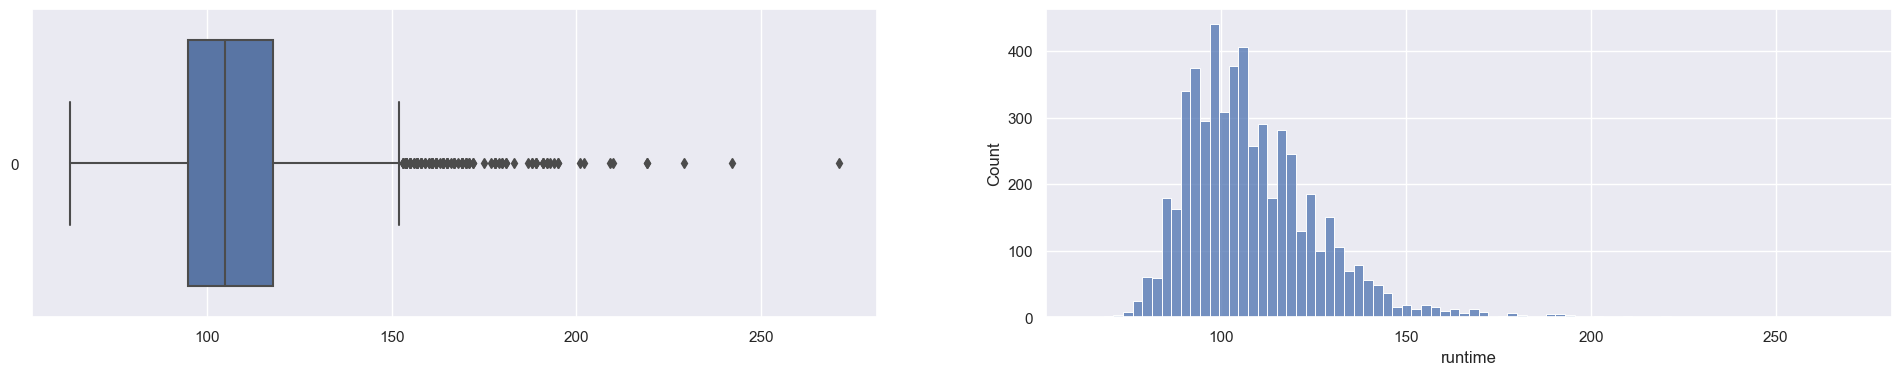

In [33]:
# runtime
f, axes = plt.subplots(1, 2, figsize=(24, 4))
sb.boxplot(data = movieData['runtime'], orient = "h", ax = axes[0])
sb.histplot(data = movieData['runtime'], ax = axes[1])

In [34]:
movieData['runtime'].describe()

count    5423.000000
mean      108.150655
std        18.113254
min        63.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       271.000000
Name: runtime, dtype: float64

For runtime:

Median is 105.000000. 

The lower quartile(Q1) which is  95.000000 

The higher quartile(Q3) which is 118.000000.

The mean is 108.150655

Distribution is slightly skewed to the right(positive skew).

#### 2. Budget

<Axes: xlabel='budget', ylabel='Count'>

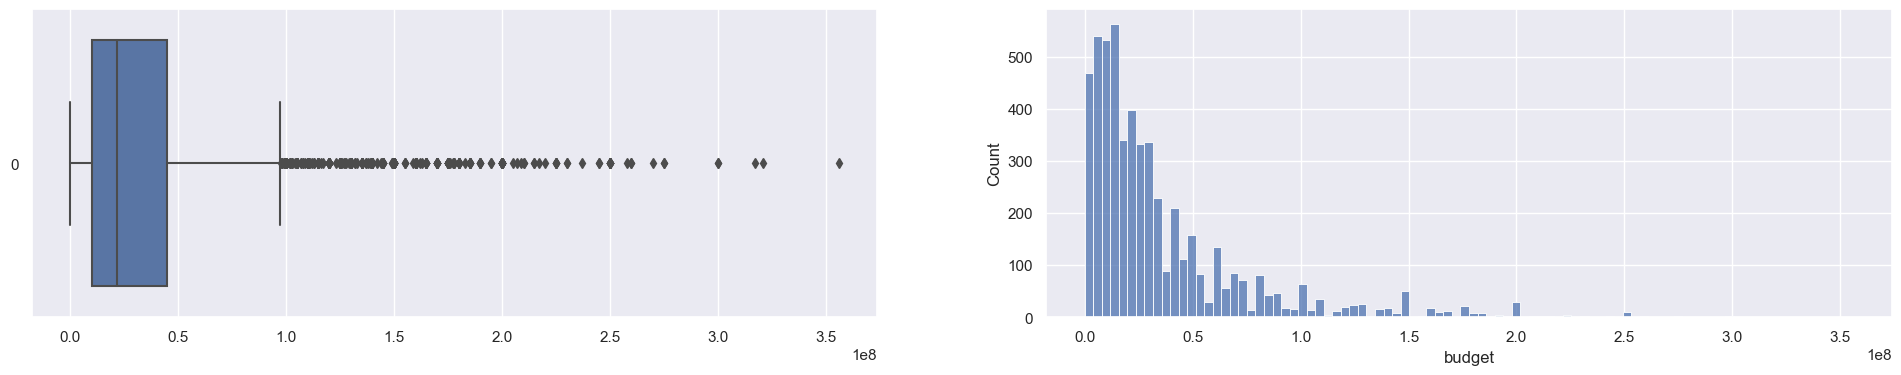

In [35]:
# budget
f, axes = plt.subplots(1, 2, figsize=(24, 4))
sb.boxplot(data = movieData['budget'], orient = "h", ax = axes[0])
sb.histplot(data = movieData['budget'], ax = axes[1])

In [36]:
movieData['budget'].describe()

count    5.423000e+03
mean     3.599741e+07
std      4.157029e+07
min      6.000000e+03
25%      1.000000e+07
50%      2.150000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

For runtime:


Median is 2.150000e+07

The lower quartile(Q1) which is 1.000000e+07 

the higher quartile(Q3) which is 4.500000e+07.

The mean is 3.599741e+07

Distribution is very skewed to the right(very positively skewed).

#### 3. Votes

<Axes: xlabel='votes', ylabel='Count'>

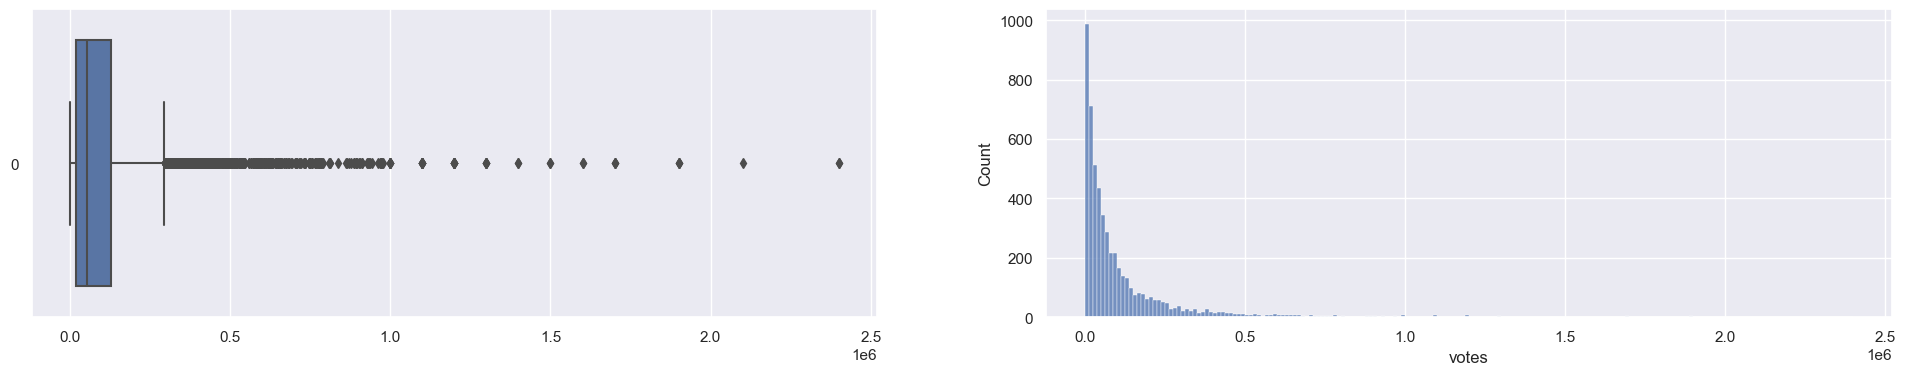

In [37]:
# votes
f, axes = plt.subplots(1, 2, figsize=(24, 4))
sb.boxplot(data = movieData['votes'], orient = "h", ax = axes[0])
sb.histplot(data = movieData['votes'], ax = axes[1])

In [38]:
movieData['votes'].describe()

count    5.423000e+03
mean     1.150239e+05
std      1.843864e+05
min      1.950000e+02
25%      1.900000e+04
50%      5.200000e+04
75%      1.290000e+05
max      2.400000e+06
Name: votes, dtype: float64

For votes:

Median is 5.200000e+04 . 

The lower quartile(Q1) which is 1.900000e+04 

The higher quartile(Q3) which is 1.290000e+05.

The mean is 1.150239e+05


Distribution is very skewed to the right(very positively skewed).

#### 4. Gross

<Axes: xlabel='gross', ylabel='Count'>

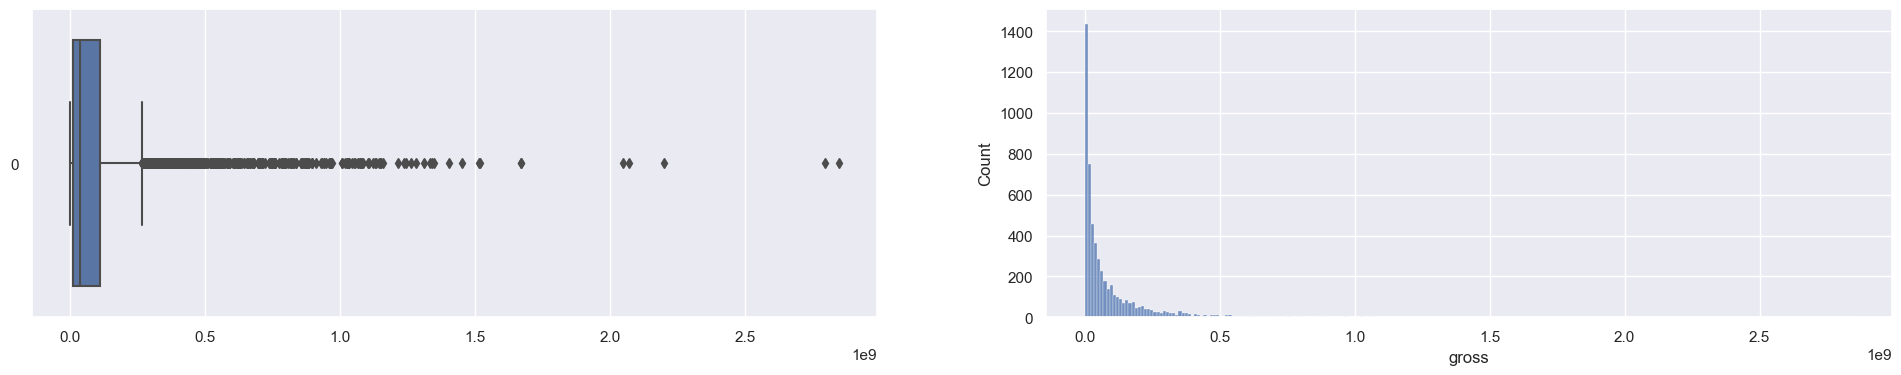

In [39]:
# gross
f, axes = plt.subplots(1, 2, figsize=(24, 4))
sb.boxplot(data = movieData['gross'], orient = "h", ax = axes[0])
sb.histplot(data = movieData['gross'], ax = axes[1])

In [40]:
movieData['gross'].describe()

count    5.423000e+03
mean     1.031923e+08
std      1.872783e+08
min      3.090000e+02
25%      1.071072e+07
50%      3.685010e+07
75%      1.124030e+08
max      2.847246e+09
Name: gross, dtype: float64

For votes:

Median is 3.685010e+07

The lower quartile(Q1) which is 1.071072e+07

The higher quartile(Q3) which is 1.124030e+08

The mean is 1.031923e+08

Distribution is very skewed to the right(very positively skewed).

### Categorical Predictors 

#### 1. Rating

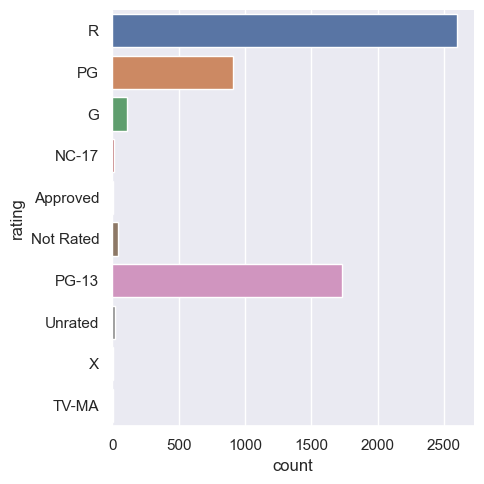

In [41]:
sb.catplot(y = 'rating', data = movieData, kind = "count")

The rating for R is highest among the other categories follwed by PG-13, PG, G, Not Rated,Unrated and NC-17.

#### 2. Genre

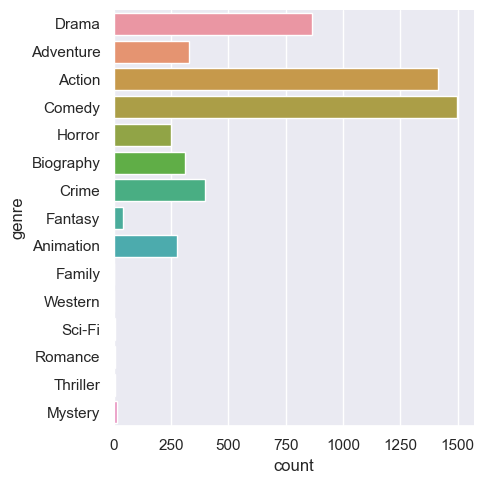

In [42]:
## genre
sb.catplot(y='genre', data=movieData, kind="count")

In [43]:
genre_counts = movieData['genre'].value_counts()
print(genre_counts)

Comedy       1496
Action       1415
Drama         864
Crime         399
Adventure     327
Biography     312
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64


The count for the genre Comedy is highest of all followed by Action, Drama, Crime, Adventure, Biography, Animation, Horror, Fantasy, Mystery, Thriller, Sci-Fi, Romance, Family and lastly Western.

#### 3. Country 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'United Kingdom'),
  Text(0, 1, 'United States'),
  Text(0, 2, 'South Africa'),
  Text(0, 3, 'West Germany'),
  Text(0, 4, 'Canada'),
  Text(0, 5, 'Australia'),
  Text(0, 6, 'Italy'),
  Text(0, 7, 'South Korea'),
  Text(0, 8, 'Sweden'),
  Text(0, 9, 'Spain'),
  Text(0, 10, 'Hong Kong'),
  Text(0, 11, 'Mexico'),
  Text(0, 12, 'Switzerland'),
  Text(0, 13, 'France'),
  Text(0, 14, 'New Zealand'),
  Text(0, 15, 'Japan'),
  Text(0, 16, 'Yugoslavia'),
  Text(0, 17, 'Ireland'),
  Text(0, 18, 'Germany'),
  Text(0, 19, 'Austria'),
  Text(0, 20, 'Portugal'),
  Text(0, 21, 'China'),
  Text(0, 22, 'Taiwan'),
  Text(0, 23, 'Republic of Macedonia'),
  Text(0, 24, 'Russia'),
  Text(0, 25, 'Federal Republic of Yugoslavia'),
  Text(0, 26, 'Iran'),
  Text(0, 27, 'Czec

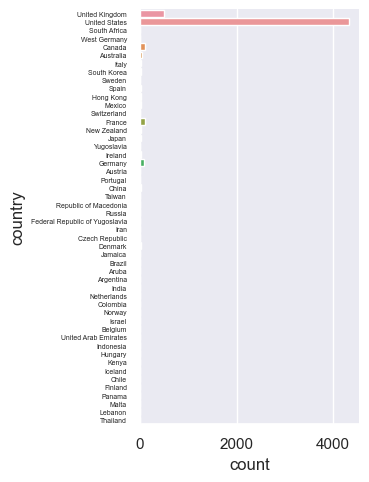

In [44]:
##Country
sb.catplot(y='country', data=movieData, kind= "count")
plt.yticks(fontsize=5)

The count for the country US is the higest among the other top few countries such as UK, Canada, France, Germany and Australia. 

### Exploring relationship between Numeric Predictors and Score

**Score vs Gross**

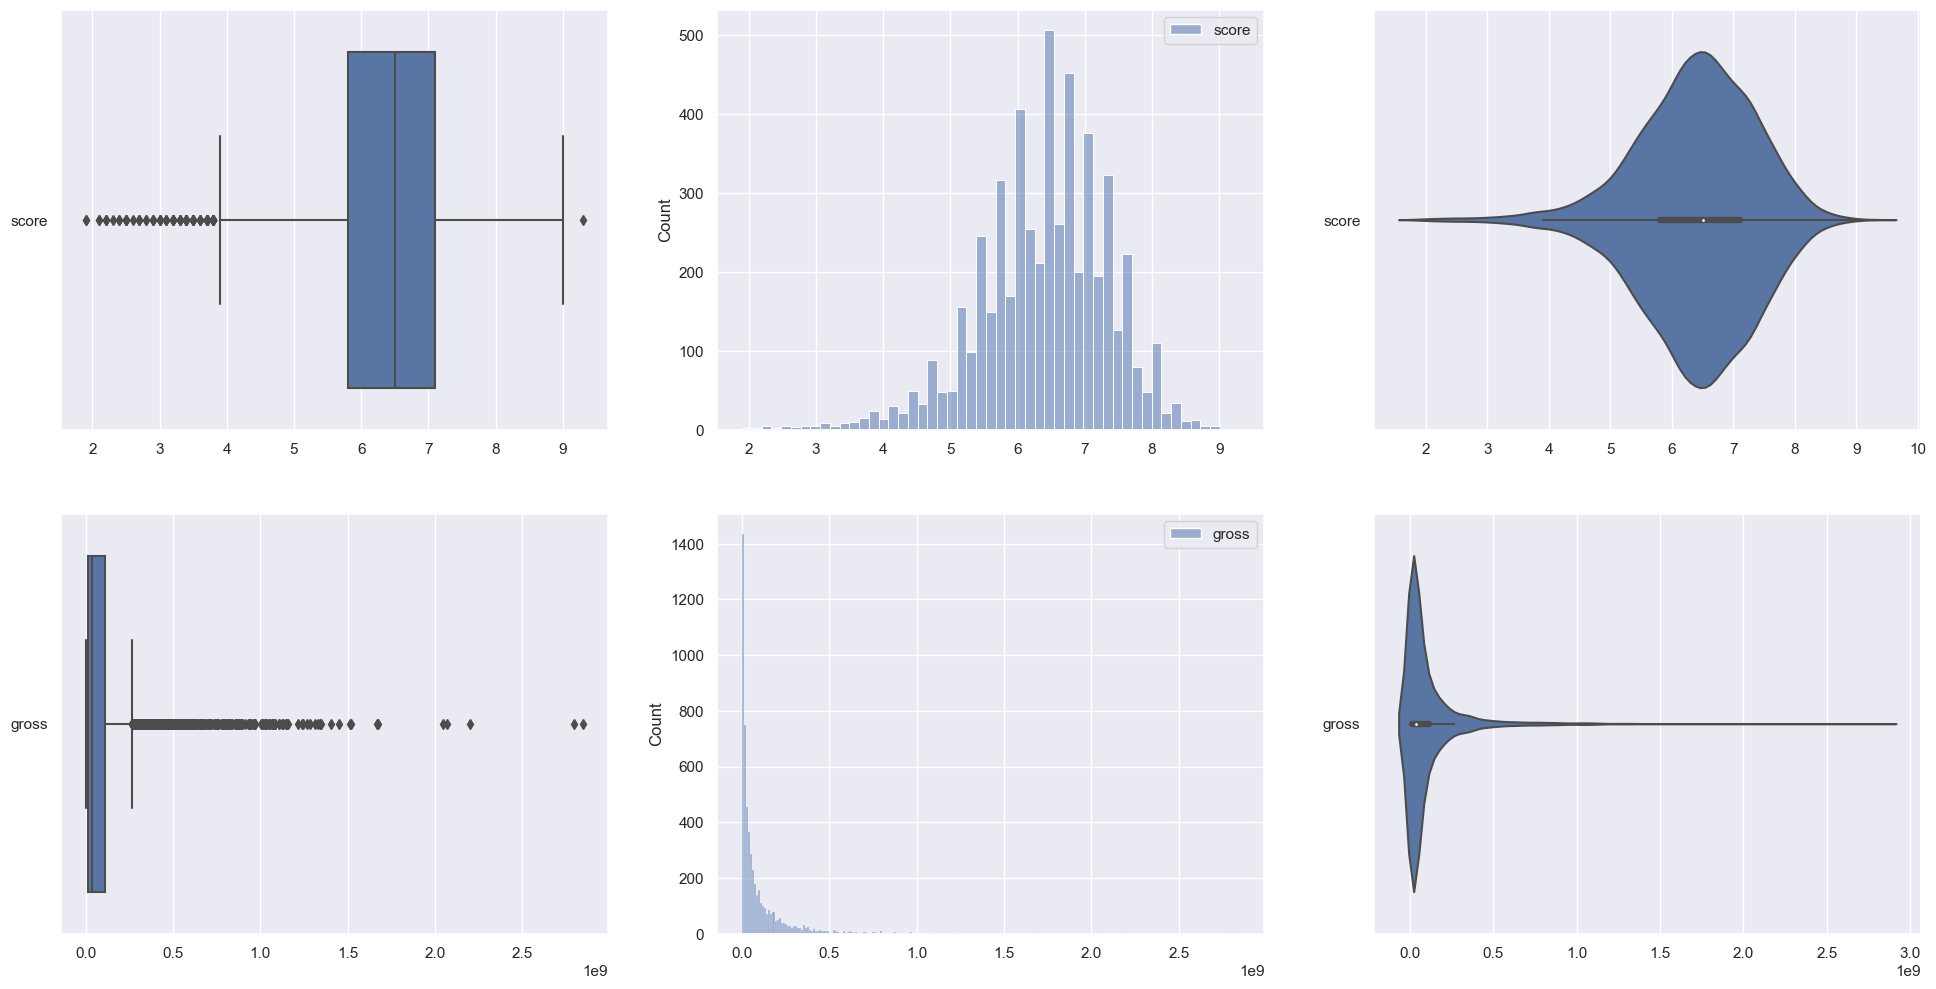

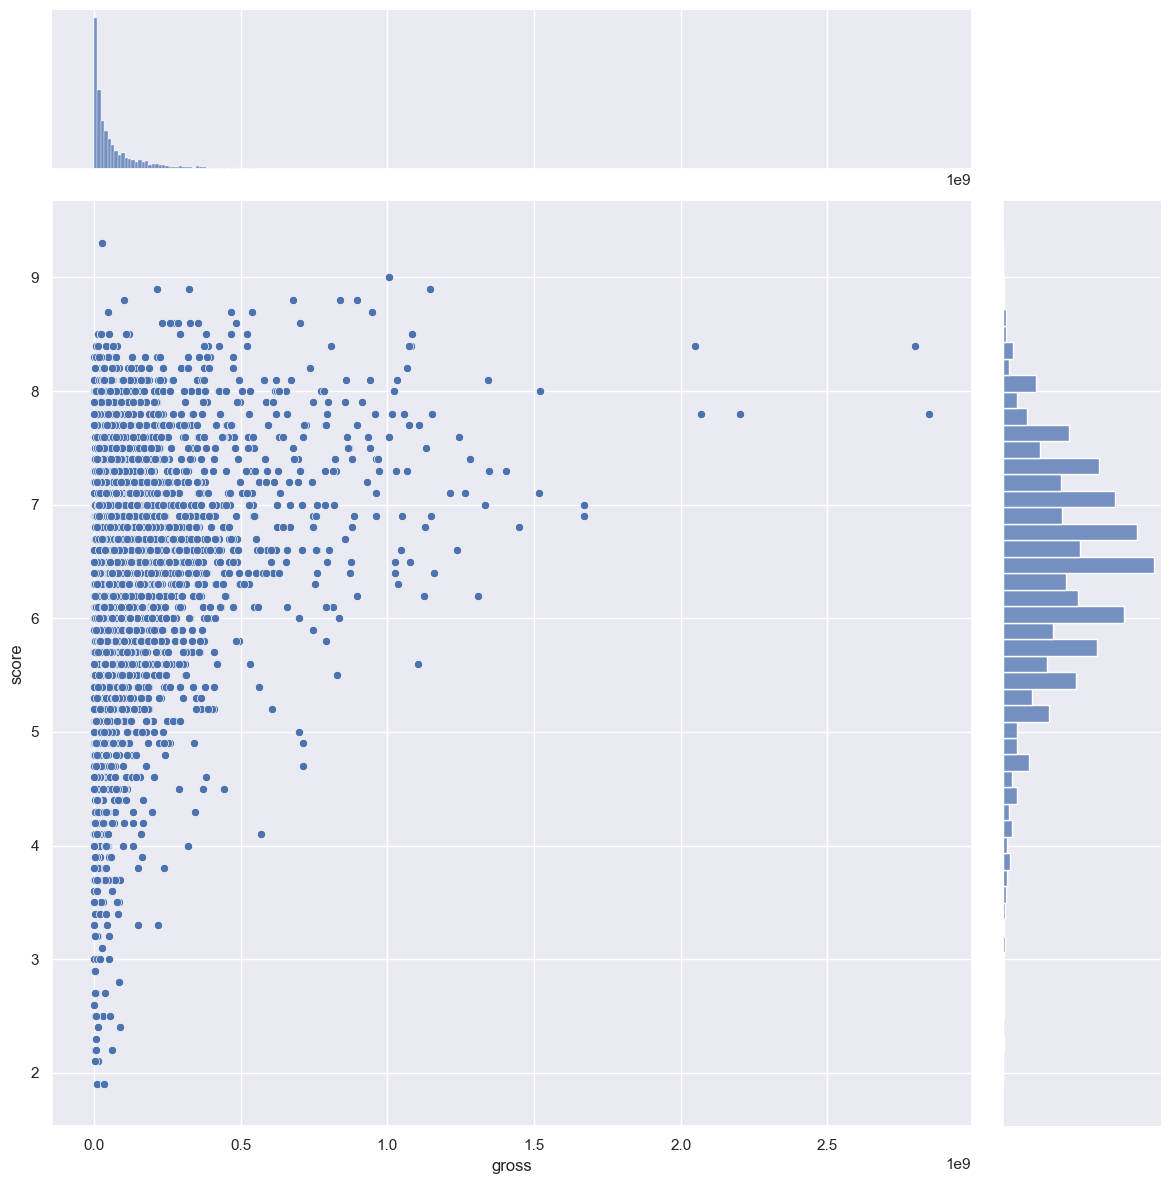

In [45]:
score = pd.DataFrame(movieData['score'])
gross = pd.DataFrame(movieData['gross'])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for score
sb.boxplot(data = score, orient = "h", ax = axes[0,0])
sb.histplot(data = score, ax = axes[0,1])
sb.violinplot(data = score, orient = "h", ax = axes[0,2])



# Plot the basic uni-variate figures for gross
sb.boxplot(data = gross, orient = "h", ax = axes[1,0])
sb.histplot(data = gross, ax = axes[1,1])
sb.violinplot(data = gross, orient = "h", ax = axes[1,2])

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([gross, score], axis = 1).reindex(gross.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "gross", y = "score", height = 12)

Score (Y-axis): The histogram for the "score" variable on the Y-axis appears to have slighty left skewed distribution. This means that the majority of movie scores tend to be higher, with fewer movies receiving lower scores.

Gross (X-axis): The histogram for the "gross" variable on the X-axis is highly right-skewed. This indicates that the majority of movies have relatively low gross earnings, with a few outliers having significantly higher earnings.

Scatterplot: The scatterplot reveals a distinctive pattern where most data points are concentrated towards the lower end of the gross earnings scale and form a dense cluster. This concentration of points indicates that the majority of movies tend to have lower gross earnings when they have moderate to high scores, predominantly clustering around a score between 6 and 8. 

As gross earnings increase, the density of data points diminishes, suggesting that fewer movies achieve high scores despite earning substantial gross revenue. This trend underscores a relationship  where higher earnings do not necessarily correlate with higher scores.

<Axes: >

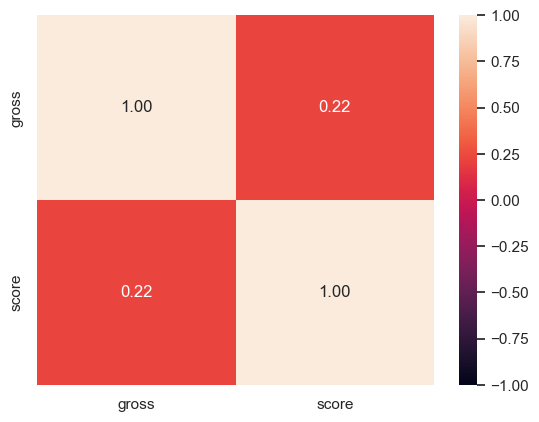

In [46]:
# Calculate the correlation between the two columns/variables 
jointDF.corr() 
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

The correlation between the score and gross is low at 0.22.

**Score vs Runtime**

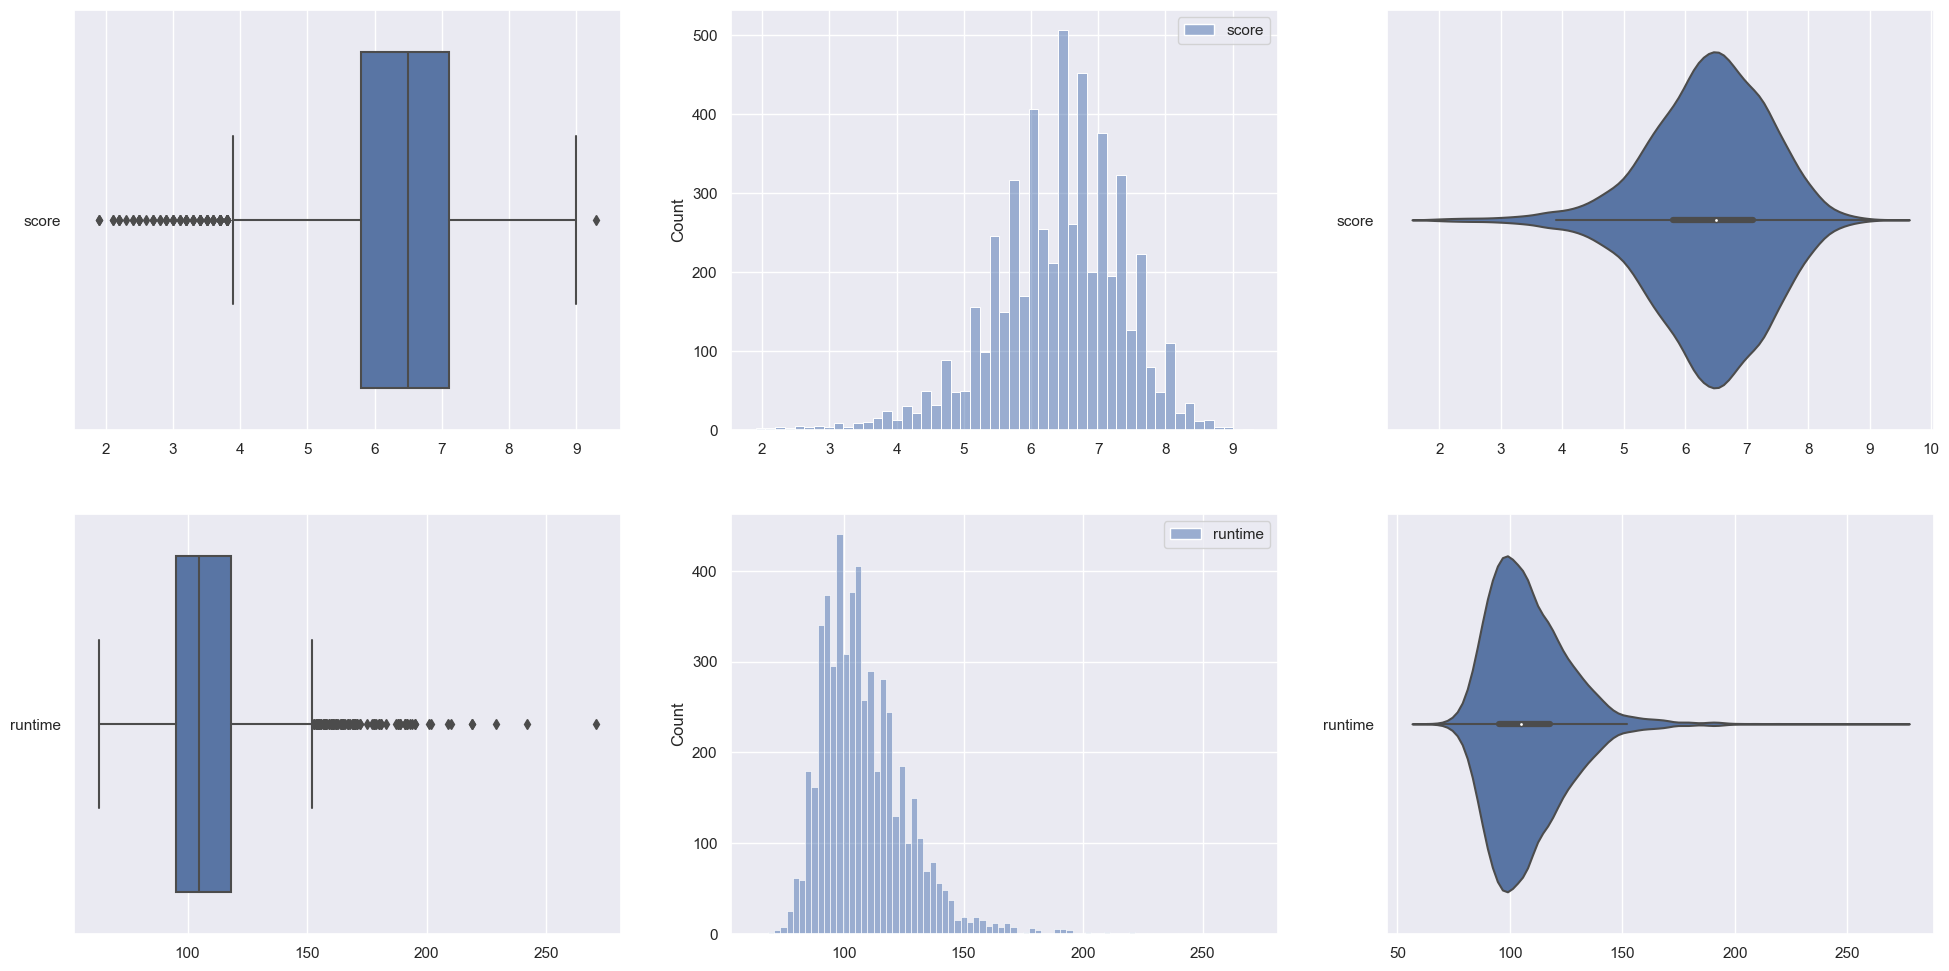

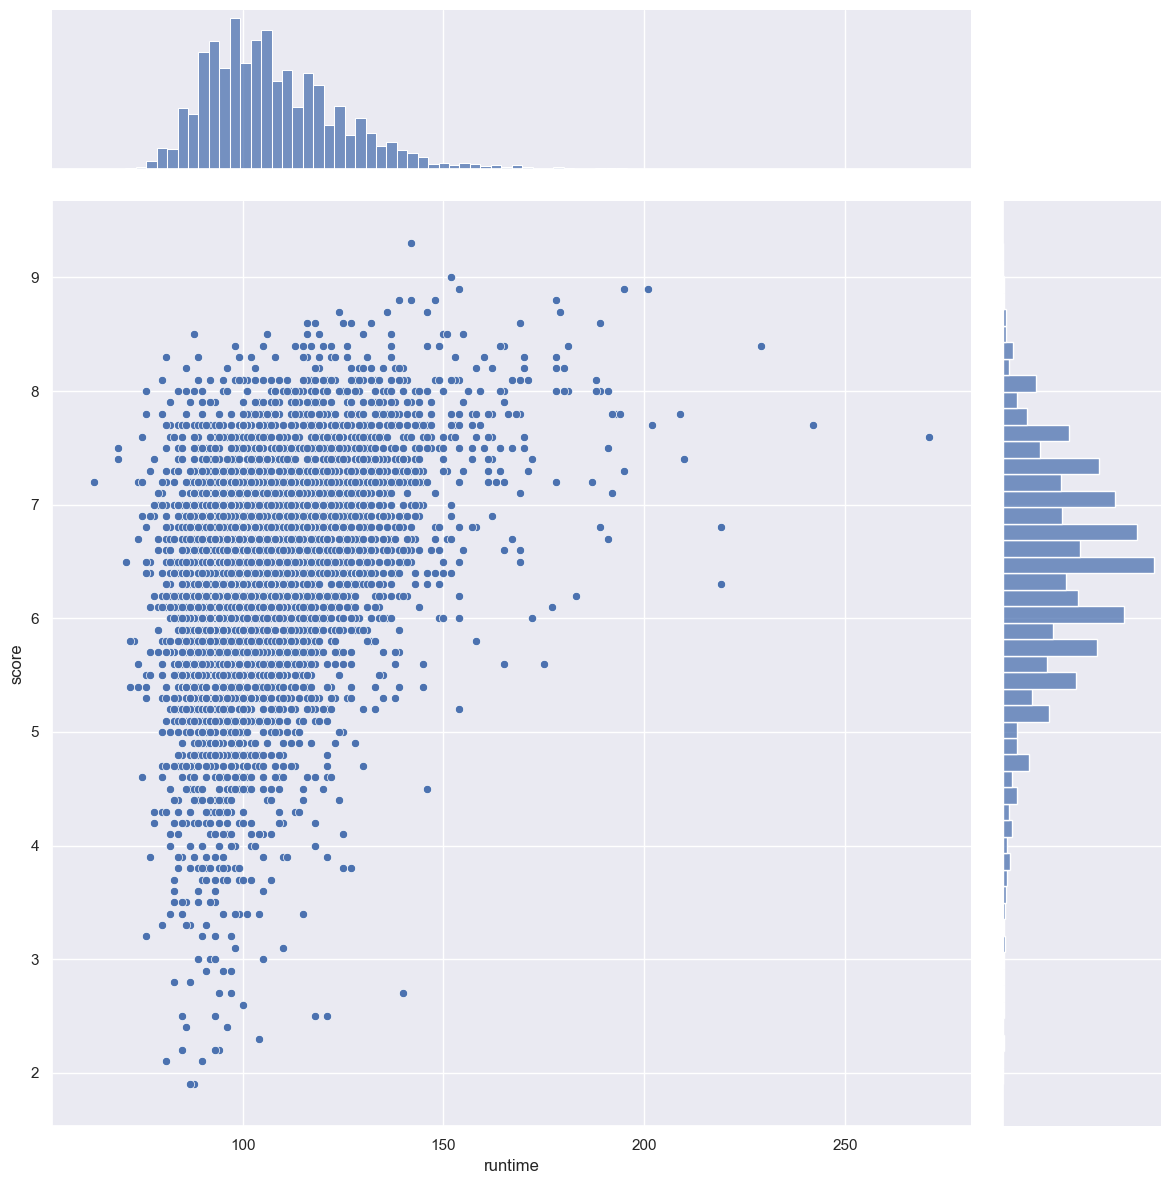

In [47]:
score = pd.DataFrame(movieData['score'])
runtime = pd.DataFrame(movieData['runtime'])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for score
sb.boxplot(data = score, orient = "h", ax = axes[0,0])
sb.histplot(data = score, ax = axes[0,1])
sb.violinplot(data = score, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for runtime
sb.boxplot(data = runtime, orient = "h", ax = axes[1,0])
sb.histplot(data = runtime, ax = axes[1,1])
sb.violinplot(data = runtime, orient = "h", ax = axes[1,2])

# Create a joint dataframe by concatenating the two variables
jointDF2 = pd.concat([runtime, score], axis = 1).reindex(runtime.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF2, x = "runtime", y = "score", height = 12)

Runtime (X-axis): The histogram for the "runtime" variable on the X-axis is slightly right-skewed, concentrating around 105 minutes. 

Scatterplot: The scatterplot reveals a distinctive pattern where most data points are concentrated towards the lower end of the runtime scale and form a dense cluster - this concentration of points indicates that the majority of movies tend to have higher score between 6 to 8 when runtime is between 95 and 118 minutes. 

As runtime increase, the density of data points diminishes, suggesting that fewer movies achieve high scores when they are longer. This trend underscores a relationship between runtimes and movie scores, where longer runtimes do not correlate with higher scores.


<Axes: >

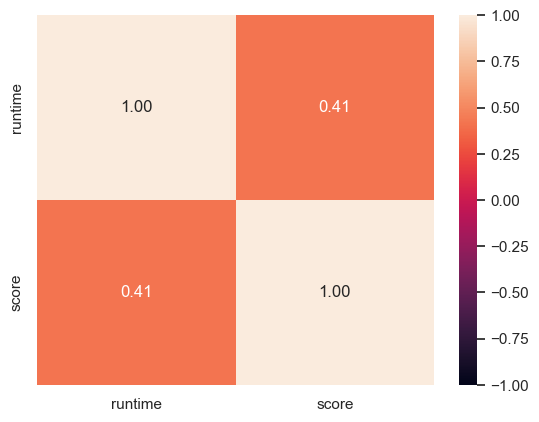

In [48]:
# Calculate the correlation between the two columns/variables 
jointDF2.corr() 
sb.heatmap(jointDF2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

The correlation between the score and runtime is low at 0.41.

**Score vs Budget**

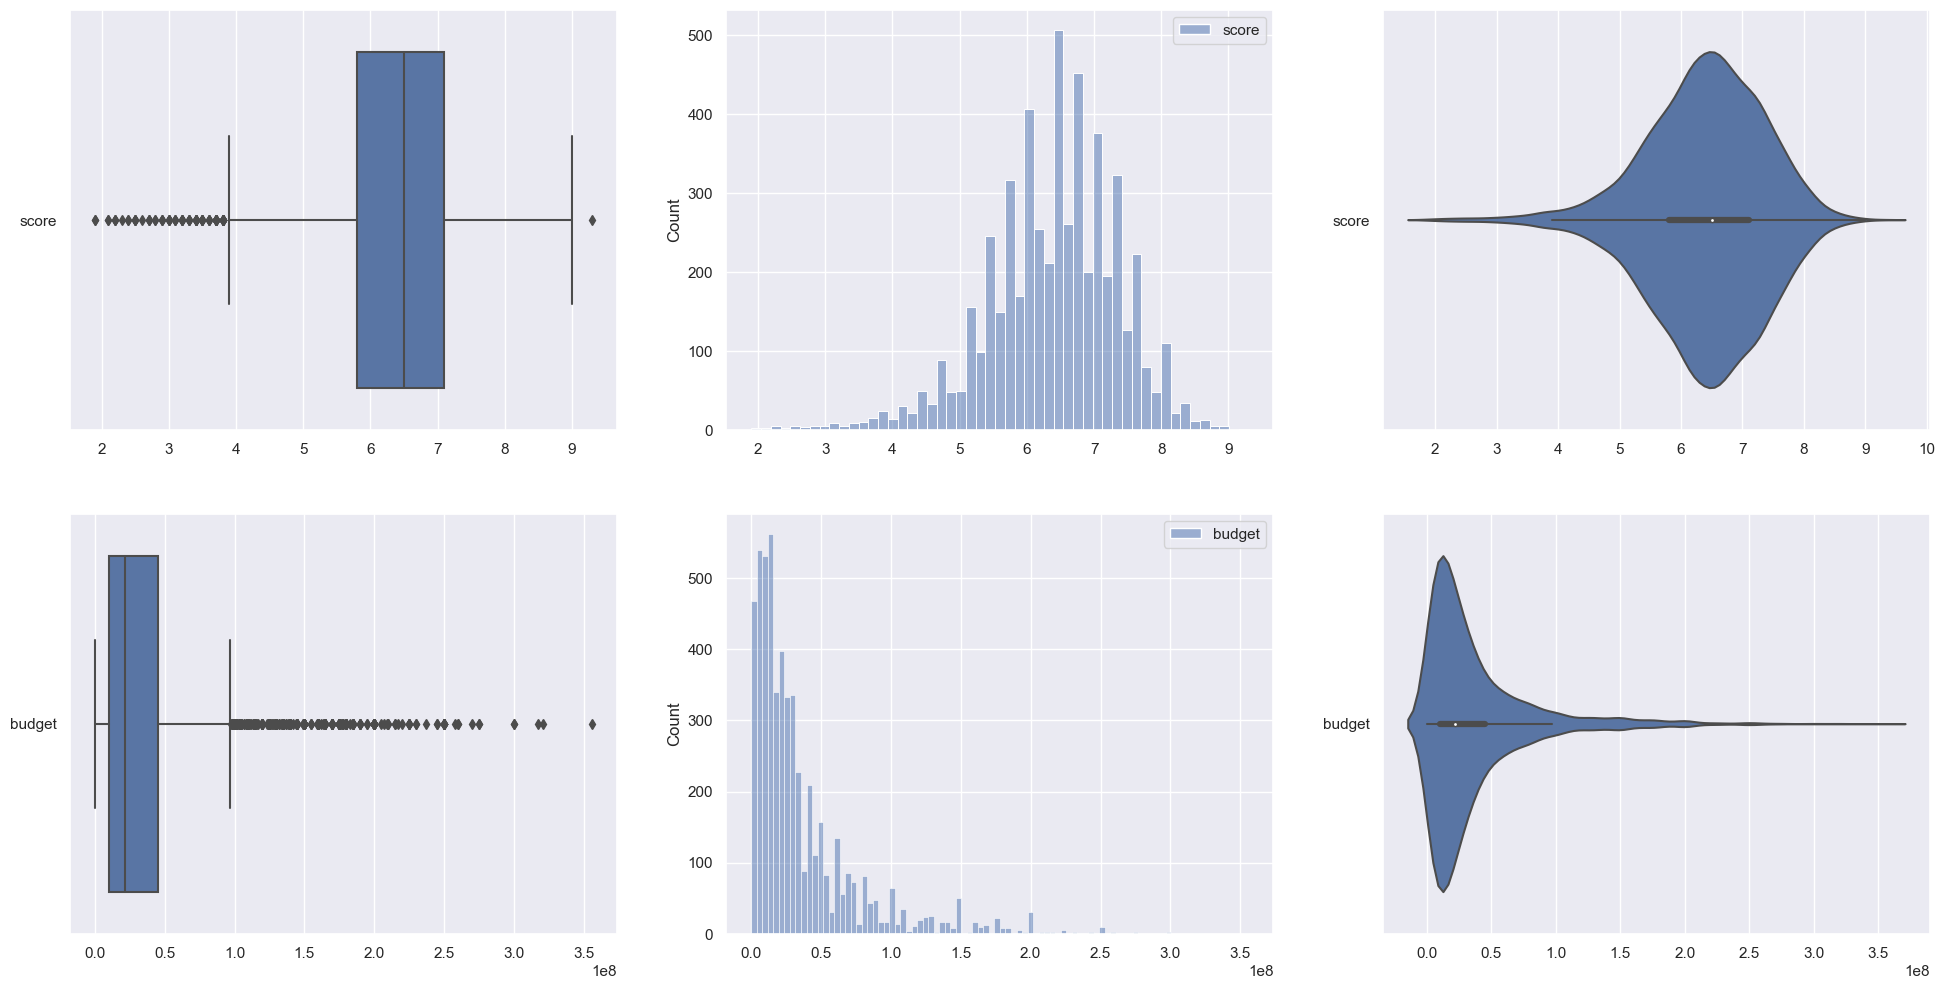

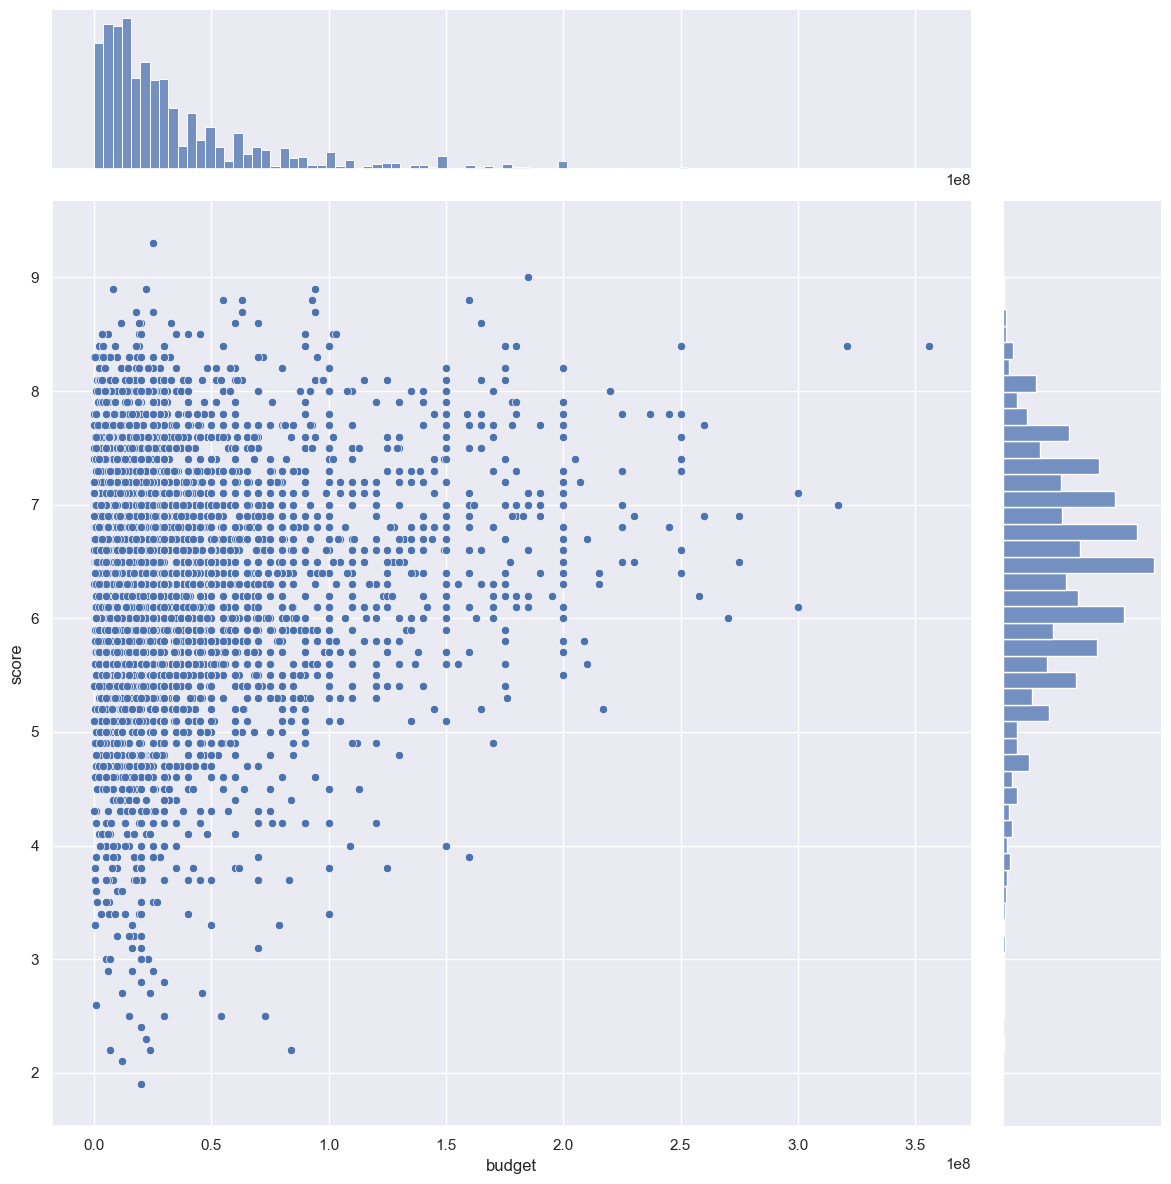

In [49]:
score = pd.DataFrame(movieData['score'])
budget = pd.DataFrame(movieData['budget'])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for score
sb.boxplot(data = score, orient = "h", ax = axes[0,0])
sb.histplot(data = score, ax = axes[0,1])
sb.violinplot(data = score, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for budget
sb.boxplot(data = budget, orient = "h", ax = axes[1,0])
sb.histplot(data = budget, ax = axes[1,1])
sb.violinplot(data = budget, orient = "h", ax = axes[1,2])

# Create a joint dataframe by concatenating the two variables
jointDF3 = pd.concat([budget, score], axis = 1).reindex(budget.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF3, x = "budget", y = "score", height = 12)

Budget (X-axis): The histogram for the "budget" variable on the X-axis is right-skewed, concentrating around 0.2180000e+08.

Scatterplot: The scatterplot reveals a distinctive pattern where most data points are concentrated towards the most lower end of the budget scale and form a dense cluster - this concentration of points indicates that the majority of movies tend to have moderate to higher scores between 5 to 8 when budget is between 0.1000000e+08 and 0.4500000e+08

As budget increases, the density of data points diminishes - However, there are some movies that still have moderate to higher scores when budget increases. But the concentration of points suggest that fewer movies achieve high scores when more budget is spent on it. This trend underscores a relationship between budget and movie scores, where higher budgets does not mean higher scores.

<Axes: >

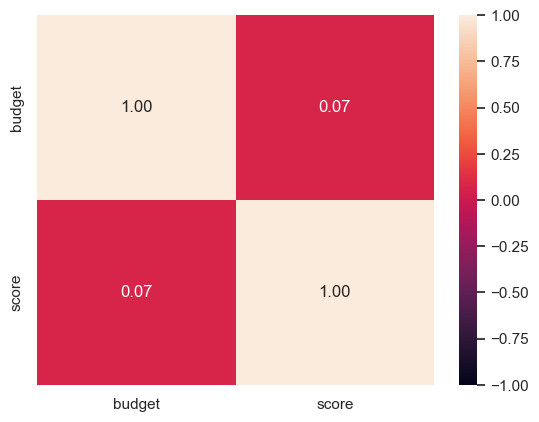

In [50]:
# Calculate the correlation between the two columns/variables 
jointDF3.corr() 
sb.heatmap(jointDF3.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

The correlation between score and budget is VERY low at 0.07.

**Score vs Votes**

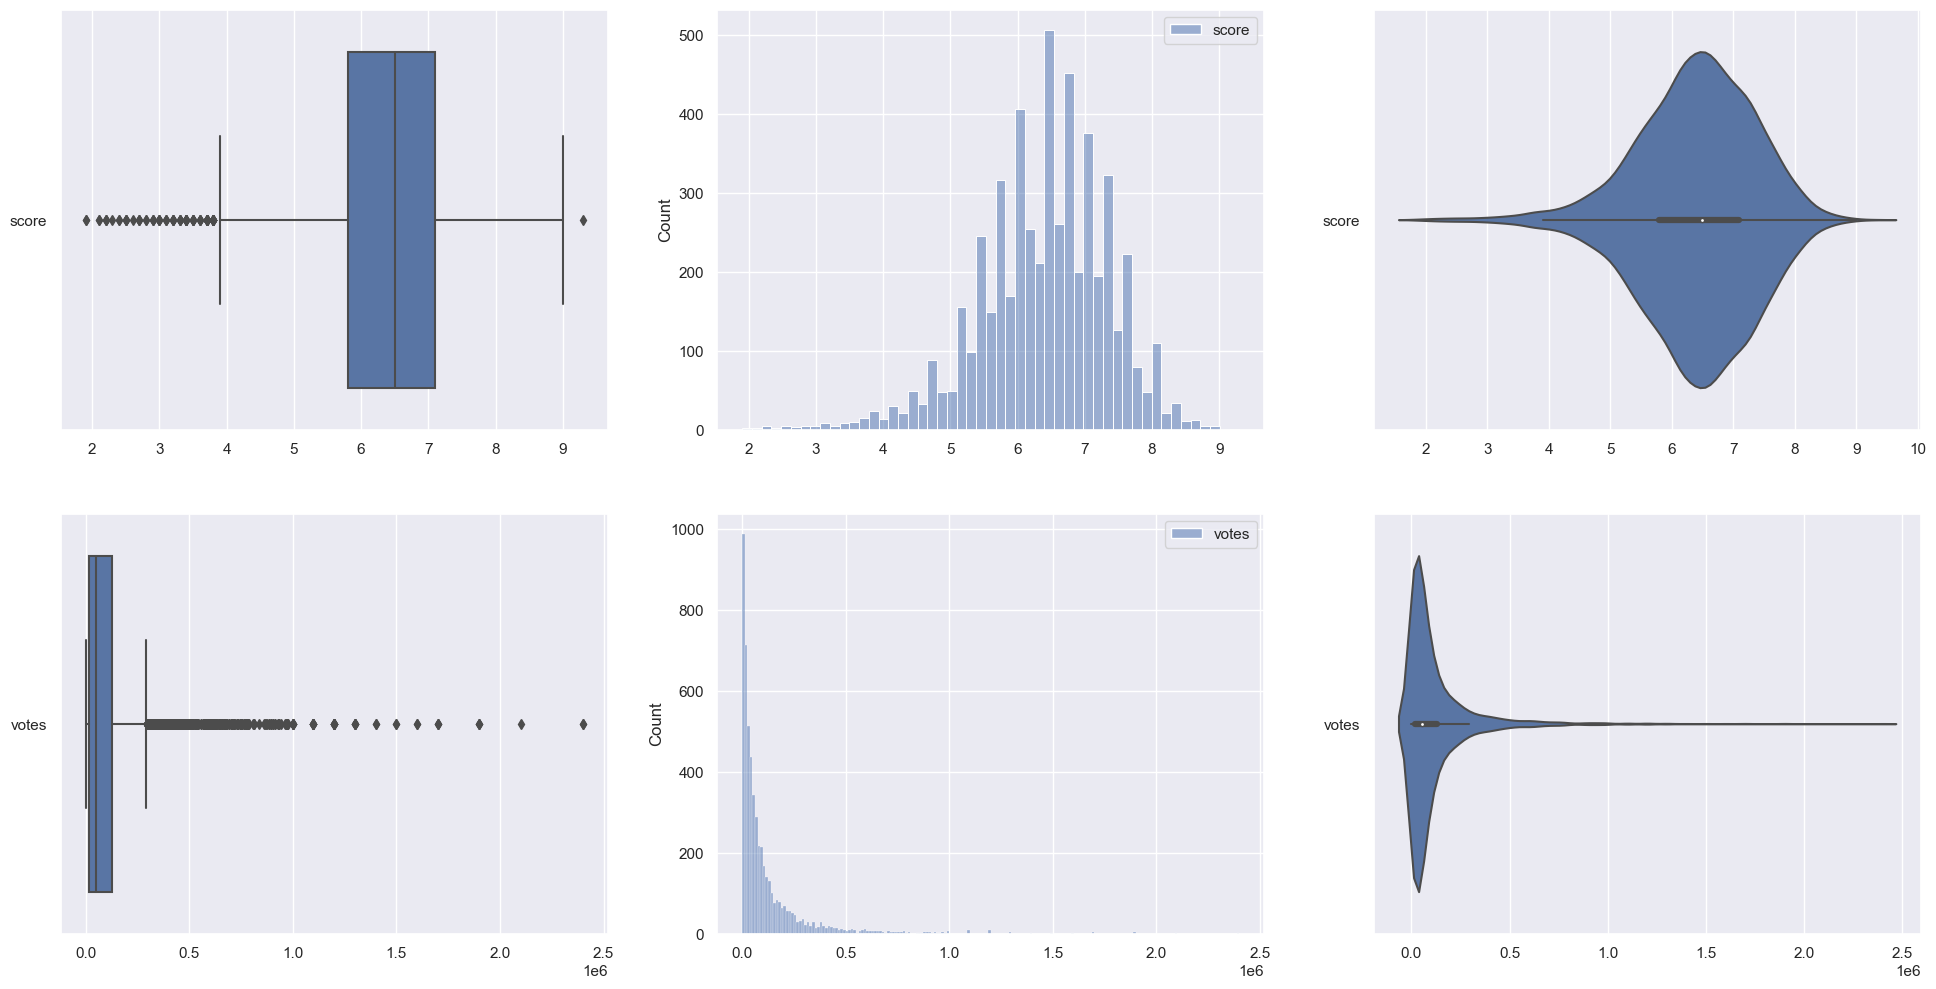

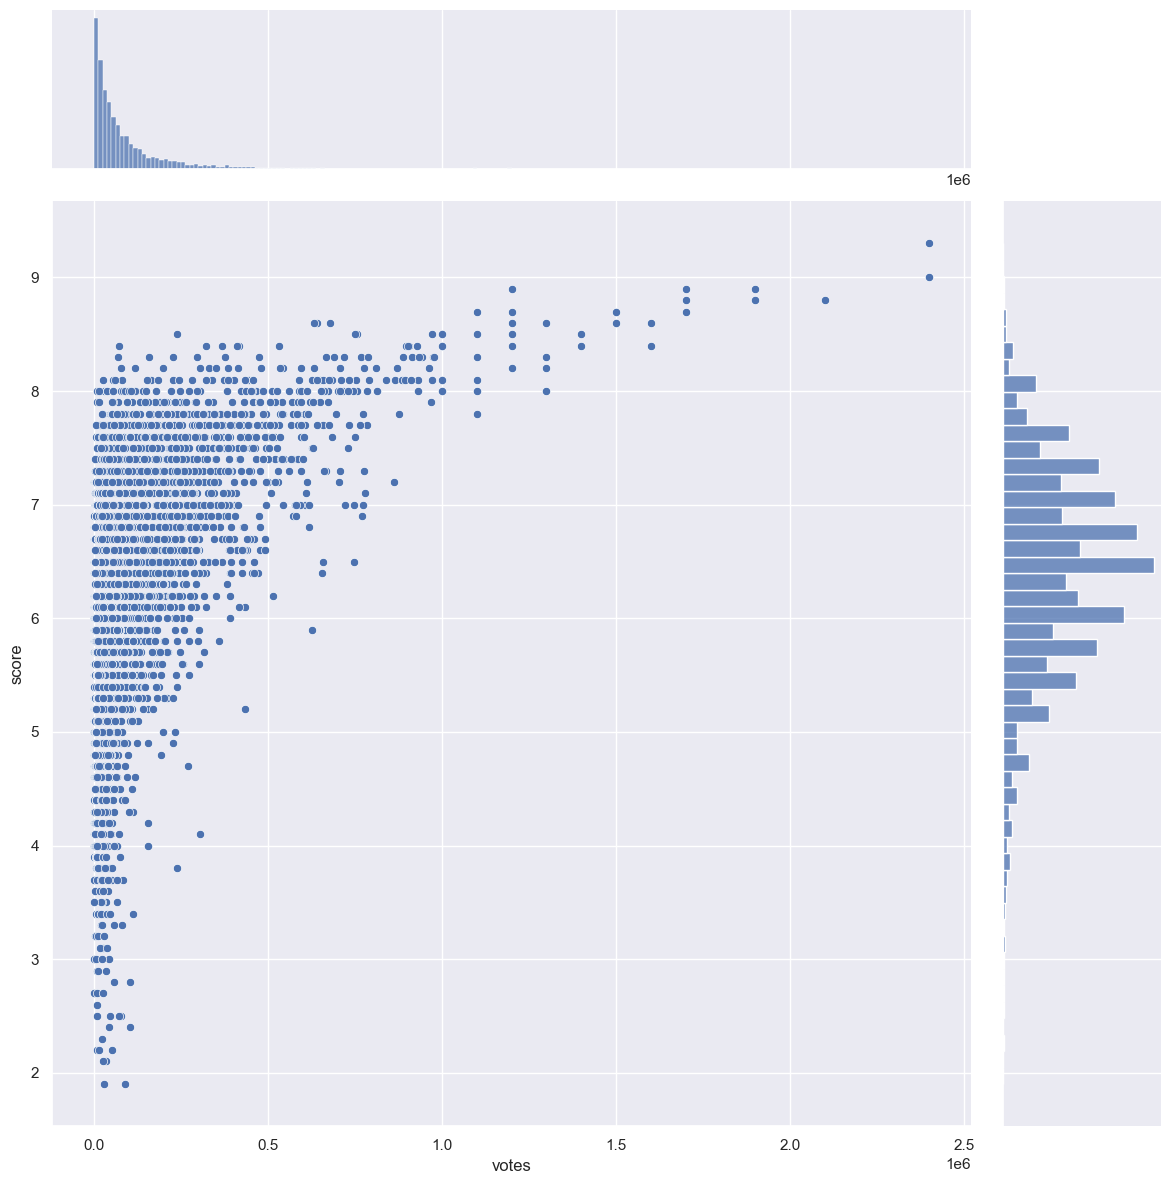

In [51]:
score = pd.DataFrame(movieData['score'])
votes = pd.DataFrame(movieData['votes'])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for score
sb.boxplot(data = score, orient = "h", ax = axes[0,0])
sb.histplot(data = score, ax = axes[0,1])
sb.violinplot(data = score, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for votes
sb.boxplot(data = votes, orient = "h", ax = axes[1,0])
sb.histplot(data = votes, ax = axes[1,1])
sb.violinplot(data = votes, orient = "h", ax = axes[1,2])

# Create a joint dataframe by concatenating the two variables
jointDF4 = pd.concat([votes, score], axis = 1).reindex(budget.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF4, x = "votes", y = "score", height = 12)

Votes (X-axis): The histogram for the "votes" variable on the X-axis is very right-skewed, concentrating around 0.05200000e+06


Scatterplot: The scatterplot reveals a distinctive pattern where most data points are concentrated towards the most lower end of the votes scale and form a dense cluster - this concentration of points indicates that the majority of movies tend to have moderate to higher score between 5 to 8 when votes is between 0.01900000e6 and 0.1290000e6

As votes increase, the density of data points diminishes with few outliers. But the concentration of points suggest that fewer movies achieve high scores when they have more votes. This trend underscores a relationship between votes and movie scores, where higher number of votes does not mean higher scores.


<Axes: >

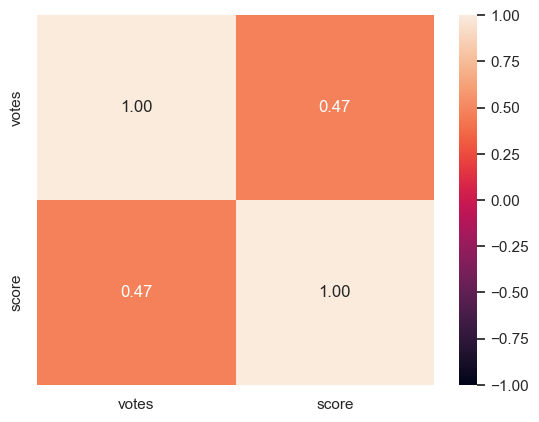

In [52]:
# Calculate the correlation between the two columns/variables 
jointDF4.corr() 
sb.heatmap(jointDF4.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

The correlation between score and votes is low at 0.47.

#### Overall summary of the different jointplots and their correlations

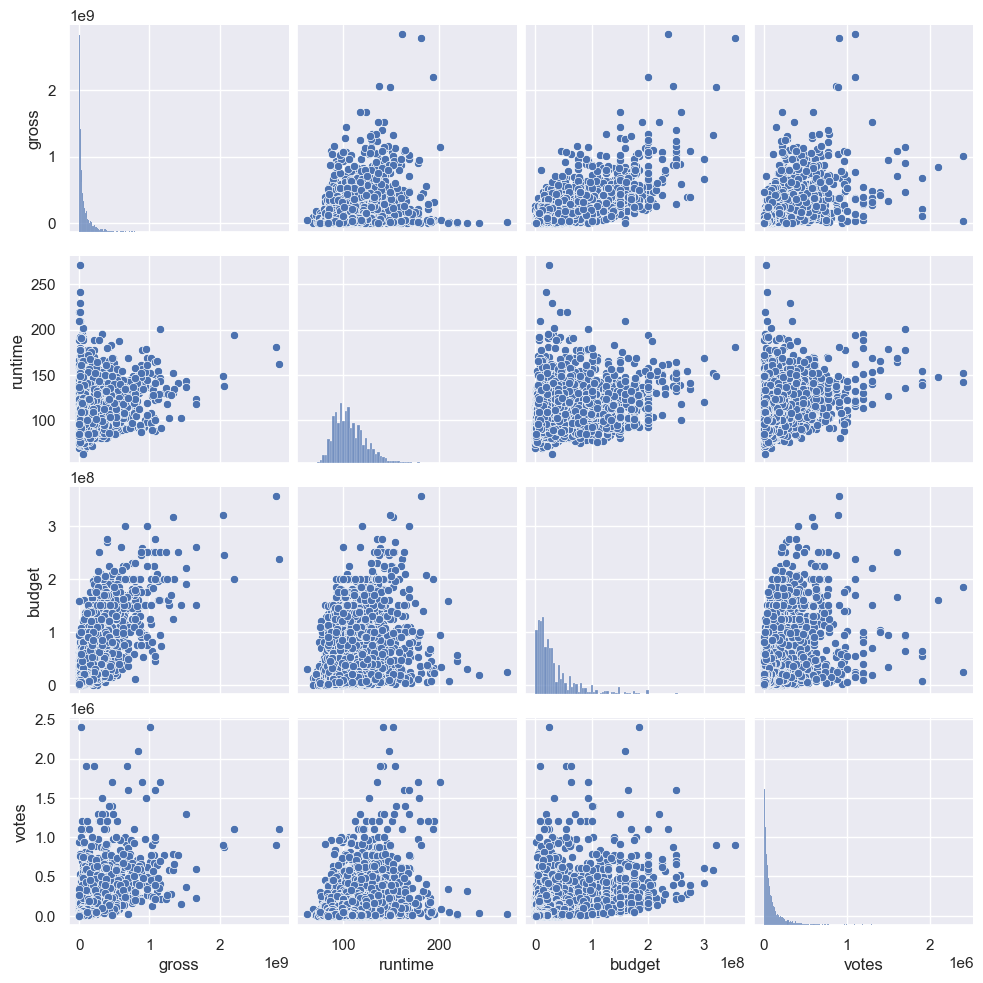

In [53]:
numeric_data = movieData[['gross','runtime', 'budget', 'votes']]
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

### Exploring relationship between Categorical Predictors and Score

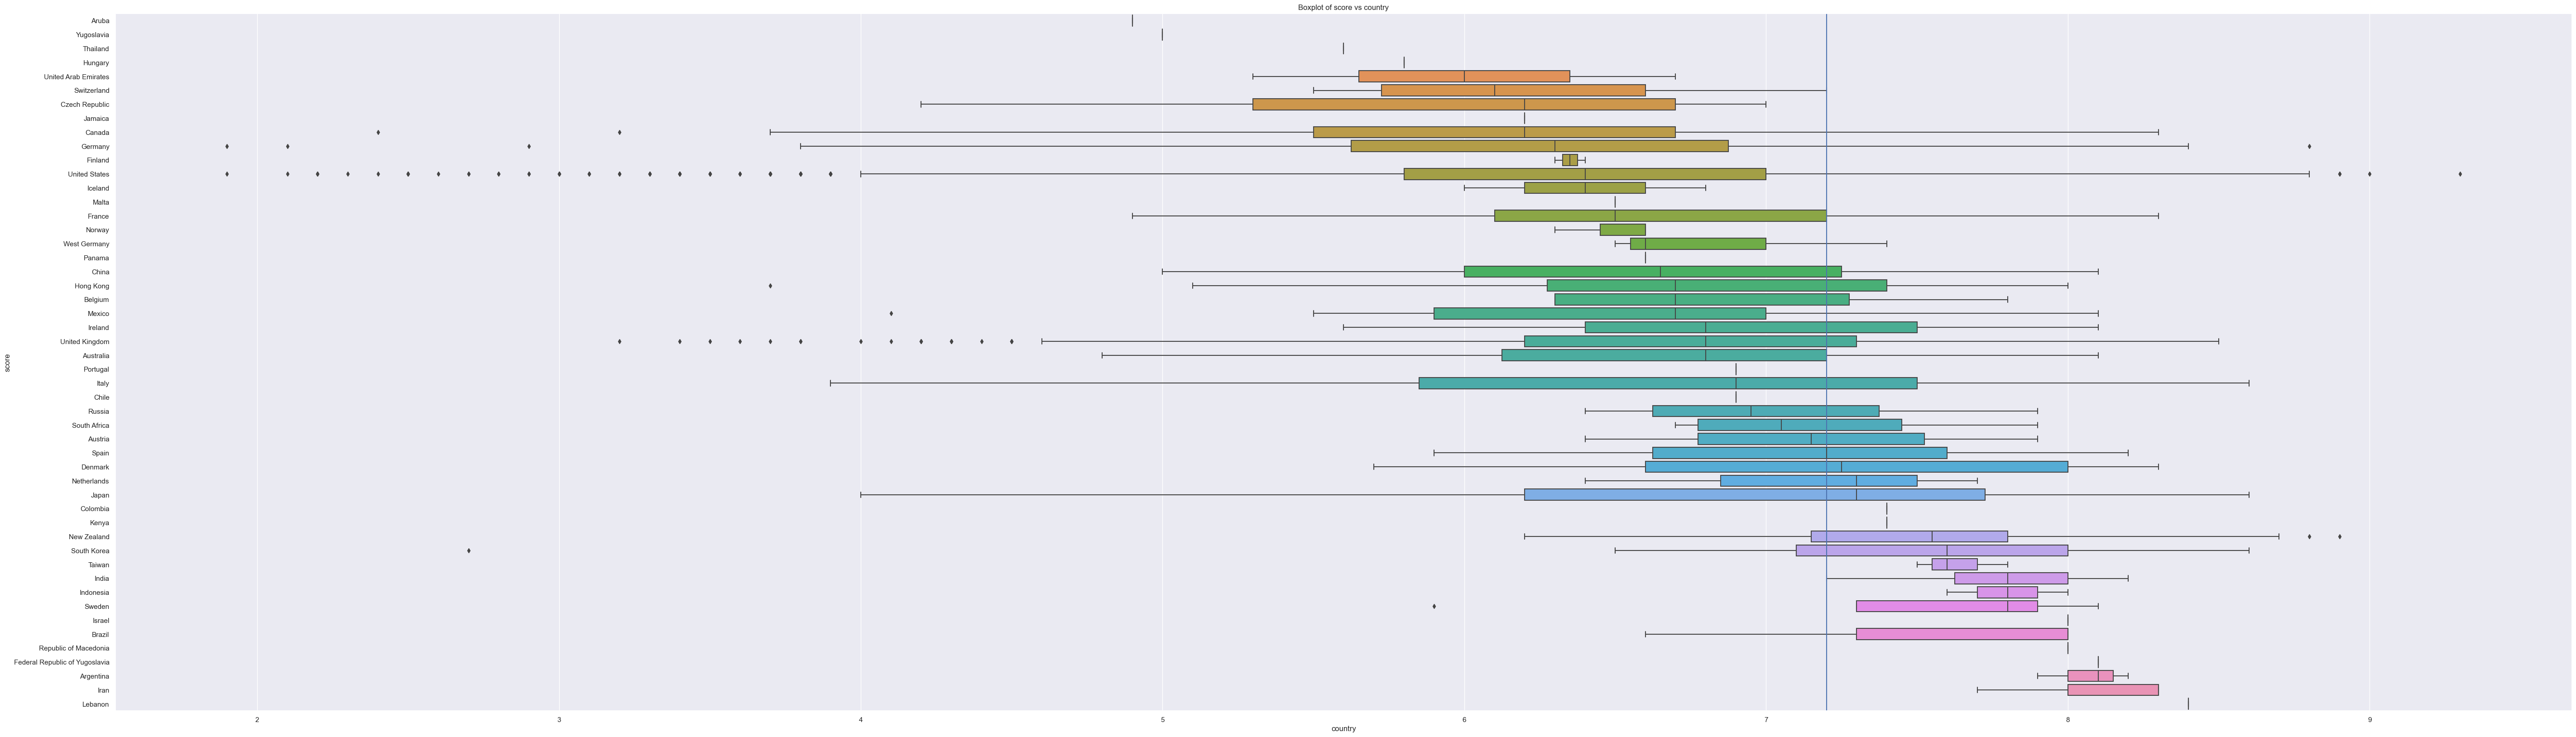

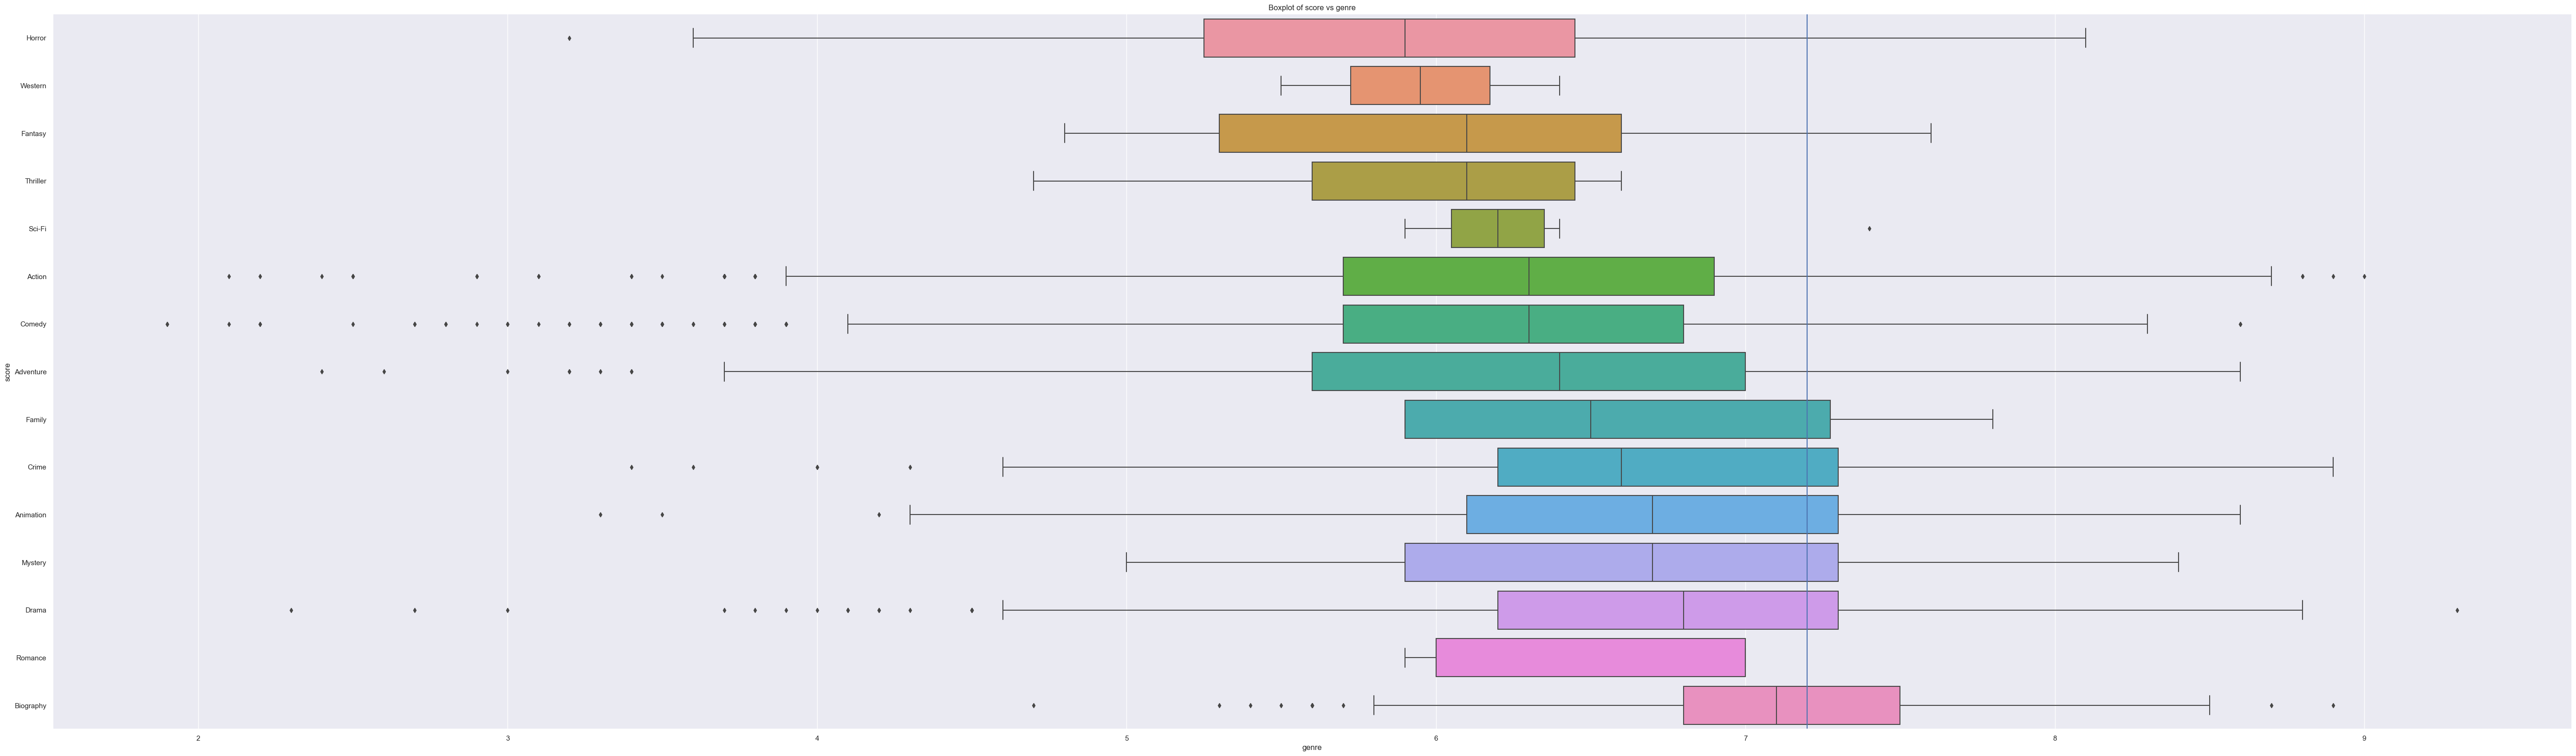

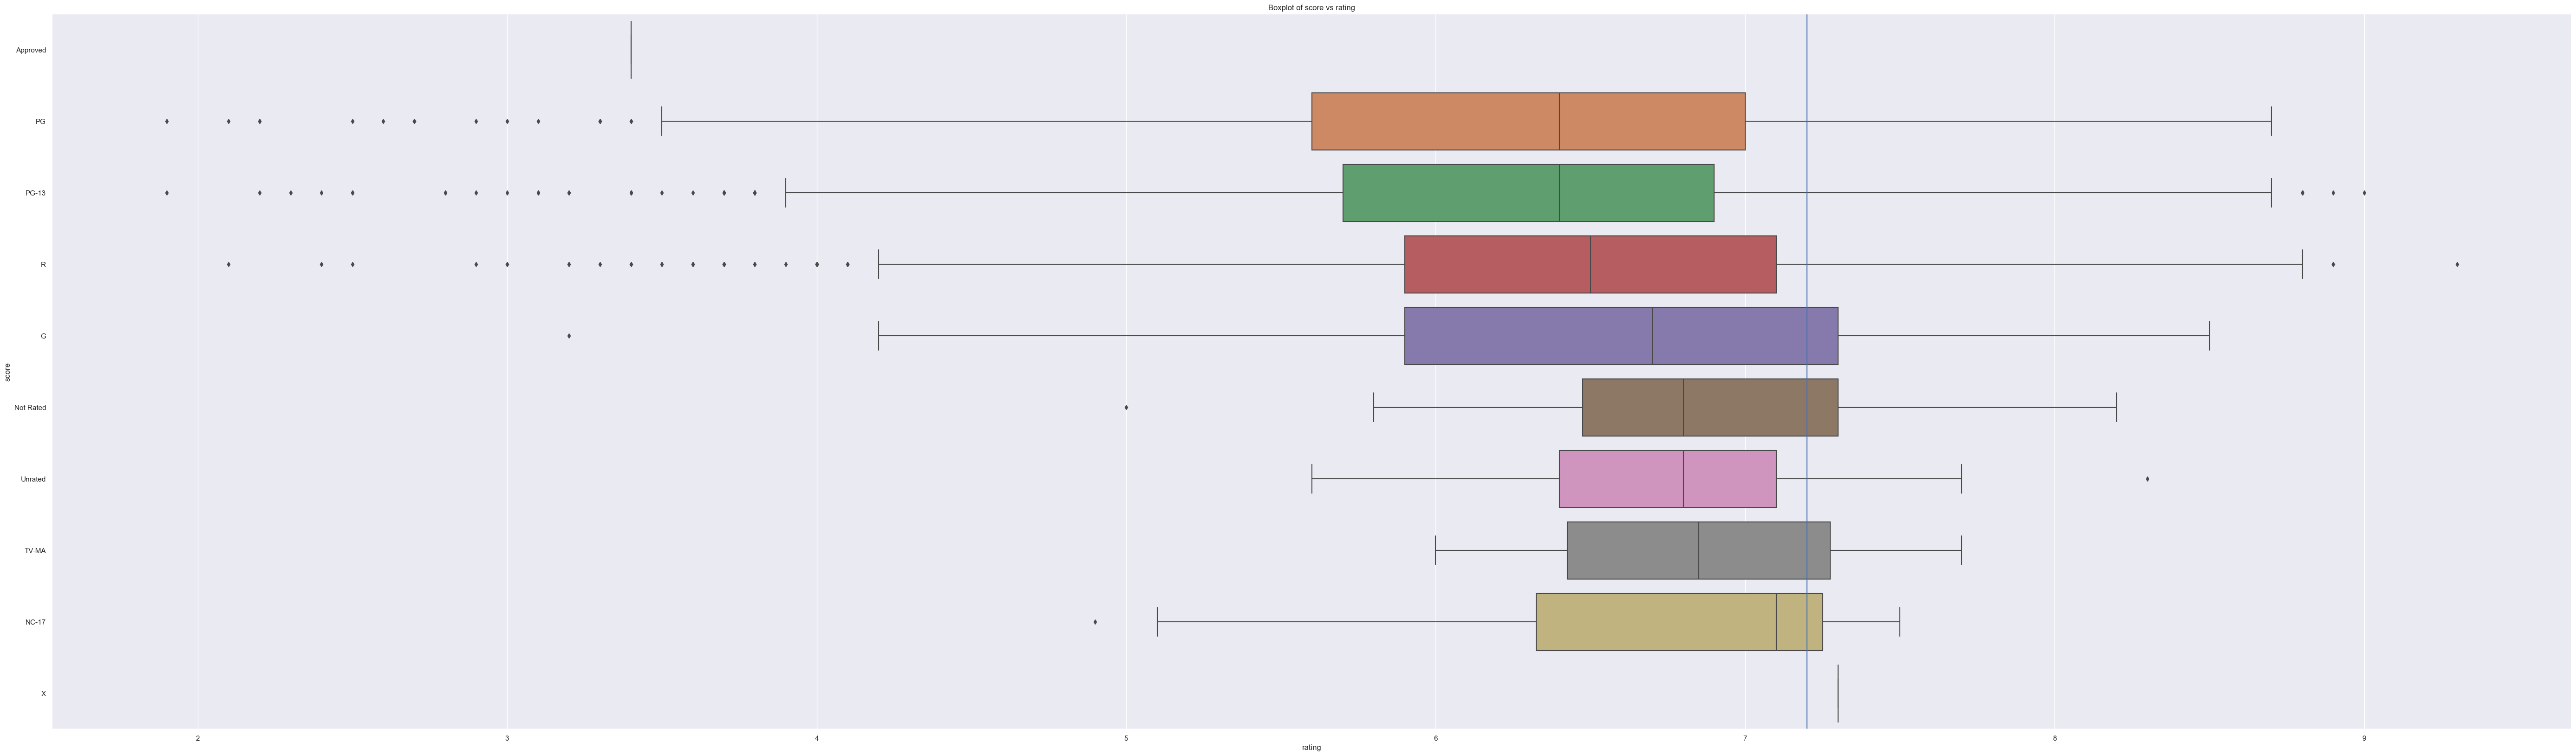

In [54]:
categoricalmovieData = movieData[['country','genre', 'rating']]
for column in categoricalmovieData.columns:
    plt.figure(figsize=(70, 20))  
    sb.boxplot(data=movieData, x='score', y= column, order = movieData.groupby(column)['score'].median().sort_values().index)
    plt.title(f'Boxplot of score vs {column}')
    plt.xlabel(column)
    plt.ylabel('score')
    plt.axvline(7.2);
    plt.show()


Movies towards the bottom of the plot tend to have a higher score

Movies with genre - Family, crime, animation, mystery, drama and biography tend to have higher score. 

Movies with ratings - G, not rated, TV-MA and NC-17 tend to have higher score.

##### CONCLUSION

Looking at the 4 heatmaps , the correlation between SCORE and the 4 numerical predictors have a low correlation, with all of their correlation being below 0.5, with votes having the highest at 0.47. This shows that all the variables have a low linear correlation against score. 

Hence given our low correlations, first we will be exploring the Random Forest Regression since decision trees and ensemble methods like random forests are robust to non-linear relationships between predictors and the response variable. They can capture complex interactions and patterns in the data without relying on linear correlation.

## Exploring Statistical Models 


### 1. Random Forest Regression

We want to predict the score of a movie using this statistical model by leveraging relevant predictors such that our model can learn from historical data to forecast the score of new movies.

Firstly, one-hot encoding is carried out to convert categorical variables into a numerical format that can be provided to ML algorithms. In this code, the categorical variables 'country', 'genre', and 'rating' are being one-hot encoded using the get_dummies() function.

In [55]:
encoded_data = pd.get_dummies(movieData, columns=['country', 'genre', 'rating'])

# Display the first few rows of the encoded DataFrame
print(encoded_data.head())

         gross  runtime      budget      votes  score  country_Argentina  \
0   46998772.0    146.0  19000000.0   927000.0    8.4                  0   
1   58853106.0    104.0   4500000.0    65000.0    5.8                  0   
2  538375067.0    124.0  18000000.0  1200000.0    8.7                  0   
3   83453539.0     88.0   3500000.0   221000.0    7.7                  0   
4   39846344.0     98.0   6000000.0   108000.0    7.3                  0   

   country_Aruba  country_Australia  country_Austria  country_Belgium  ...  \
0              0                  0                0                0  ...   
1              0                  0                0                0  ...   
2              0                  0                0                0  ...   
3              0                  0                0                0  ...   
4              0                  0                0                0  ...   

   rating_Approved  rating_G  rating_NC-17  rating_Not Rated  rating_PG  \

In [56]:
# separate the features used for prediction from the target variable. 
X = encoded_data.drop(columns=['score'])

# Target variable
y = encoded_data['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Train the Random Forest model
rf_model = RandomForestRegressor()

rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

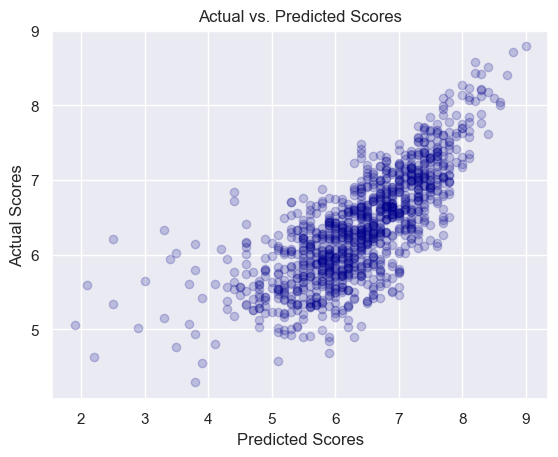

Train R^2 score: 0.9315403913181508
Test R^2 score: 0.561057077119711
MAE: 0.4715447004608294
MSE: 0.40936894746543767
RMSE: 0.6398194647441087


In [47]:
# Predict using the scaled features
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)


# Plot actual vs. predicted scores
plt.scatter(y_test, y_test_pred, alpha=0.2, color="DarkBlue")
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')
plt.show()

# Evaluate the R^2 values of each set
train_r2 = rf_model.score(X_train_scaled, y_train)
test_r2 = rf_model.score(X_test_scaled, y_test)
print(f'Train R^2 score: {train_r2}')
print(f'Test R^2 score: {test_r2}')

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, rf_model.predict(X_test_scaled)))
print("MSE:", mean_squared_error(y_test, rf_model.predict(X_test_scaled)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test_scaled))))

While the training R^2 score indicates that the model fits the training data extremely well (0.93), the lower testing R^2 score (0.56) suggests that the model's performance on unseen data is not as good. Additionally, MSE is low at 0.41, indicating that the model's predictions are quite accurate on average.

One potential reason for the discrepancy between the training and testing scores could be outliers in the dataset which might be distorting the model's learning process.

#### Removal of Outliers

In [57]:
# Define a function to remove outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Remove outliers from the dataset
    clean_data = data.drop(outliers.index)
    
    return clean_data, outliers

# Columns for which outliers will be removed
columns_to_check = ['gross', 'runtime', 'budget', 'votes']

# Dictionary to store outliers
outliers_dict = {}

# Remove outliers for each column
for column in columns_to_check:
    clean_movieData, outliers = remove_outliers(movieData, column)
    outliers_dict[column] = outliers

# Print cleaned dataset
print(clean_movieData)

# Print the number of outliers removed for each column
for column, outliers in outliers_dict.items():
    print("Number of outliers removed for", column, ":", outliers.shape[0])


            gross  runtime       budget     votes        country      genre  \
1      58853106.0    104.0    4500000.0   65000.0  United States  Adventure   
3      83453539.0     88.0    3500000.0  221000.0  United States     Comedy   
4      39846344.0     98.0    6000000.0  108000.0  United States     Comedy   
5      39754601.0     95.0     550000.0  123000.0  United States     Horror   
6     115229890.0    133.0   27000000.0  188000.0  United States     Action   
...           ...      ...          ...       ...            ...        ...   
5418  426505244.0    124.0   90000000.0  140000.0  United States     Action   
5419  319715683.0     99.0   85000000.0  102000.0  United States     Action   
5420  245487753.0    101.0  175000000.0   53000.0  United States  Adventure   
5421  111105497.0    100.0  135000000.0   42000.0         Canada  Adventure   
5422  461421559.0    149.0   80000000.0    3700.0          China     Action   

         rating  score  
1             R    5.8  
3

In [58]:
encoded_data1 = pd.get_dummies(clean_movieData, columns=['country', 'genre', 'rating'])

# One-hot encode the categorical variables
X = encoded_data1.drop(columns=['score'])

# Target variable
y = encoded_data1['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

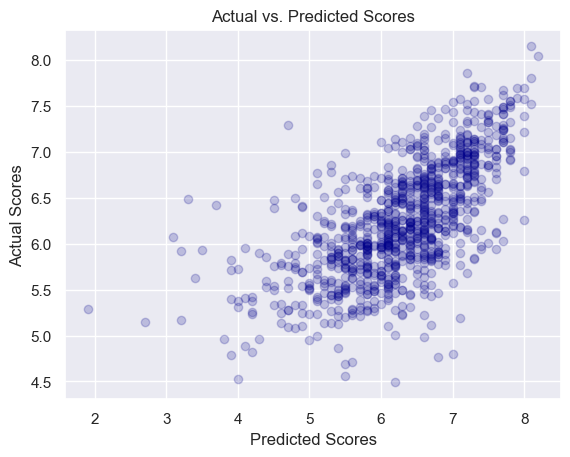

Train R^2 score: 0.9219462152636839
Test R^2 score: 0.4264807980666875
MAE: 0.49404791029561673
MSE: 0.44057304077471976
RMSE: 0.6637567632610004


In [50]:
# Predict using the scaled features
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)


# Plot actual vs. predicted scores
plt.scatter(y_test, y_test_pred, alpha=0.2, color="DarkBlue")
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')
plt.show()

# Evaluate the R^2 values of each set
train_r2 = rf_model.score(X_train_scaled, y_train)
test_r2 = rf_model.score(X_test_scaled, y_test)
print(f'Train R^2 score: {train_r2}')
print(f'Test R^2 score: {test_r2}')

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, rf_model.predict(X_test_scaled)))
print("MSE:", mean_squared_error(y_test, rf_model.predict(X_test_scaled)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test_scaled))))

Removing outliers did not help significantly in reducing the discrepancy. As seen above, the discrepancy between the training and testing R^2 scores still remains.

This indicates a potential issue with overfitting. A high training R^2 score (e.g., 0.92) suggests that the model fits the training data very well. However, the relatively lower testing R^2 score (e.g., 0.43) indicates that the model's performance on unseen data is not as good. 

Additionally, the MSE score has increased slightly from the previous model, indicating decreased accuracy.

Hence we will carry out hyperparameter tuning to find the best configuration that helps the model generalize better to unseen data, thereby reducing the discrepancy between training and testing performance.

#### Hyper Parameter Tuning

By defining the hyperparameter grid below, we can search through different combinations of these parameters to find the optimal configuration for our random forest regression model.

In [51]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [4, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 14]    # Minimum number of samples required to be at a leaf node
}

In [52]:
# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

In [53]:
# Initialize GridSearchCV with the RandomForestRegressor and the hyperparameter grid
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

In [54]:
# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 14],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [4, 100, 200, 300]},
             scoring='r2')

In [55]:
# Get the best hyperparameters
best_params = grid_search.best_params_
# Train a new RandomForestRegressor model using the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=300,
                      random_state=42)

This process aims to optimize the model's performance by selecting the hyperparameters that yield the best results on the training data. In this case it is when max_depth=10, min_samples_split=5, n_estimators=300,random_state=42

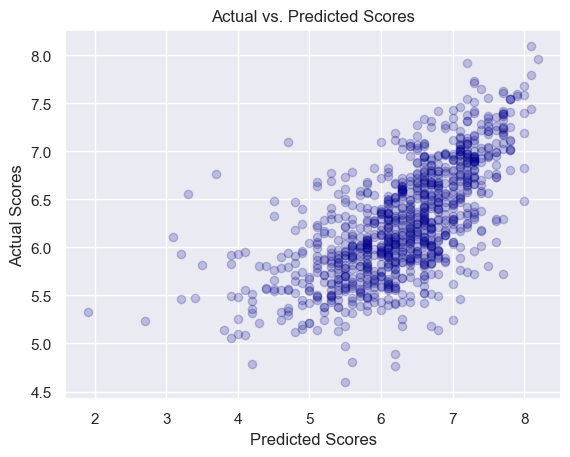

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Train R^2 score: 0.7260654850220136
Test R^2 score: 0.4400810779523724
MAE: 0.4895295366928883
MSE: 0.4301254103476565
RMSE: 0.6558394699525613


In [56]:
# Predict using the scaled features
y_train_pred = best_rf_regressor.predict(X_train_scaled)
y_test_pred = best_rf_regressor.predict(X_test_scaled)


# Plot actual vs. predicted scores
plt.scatter(y_test, y_test_pred, alpha=0.2, color="DarkBlue")
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')
plt.show()

# Evaluate the model on training and test data
train_r2 = best_rf_regressor.score(X_train_scaled, y_train)
test_r2 = best_rf_regressor.score(X_test_scaled, y_test)

print("Best hyperparameters:", best_params)
print("Train R^2 score:", train_r2)
print("Test R^2 score:", test_r2)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

After carrying out hyper parameter tuning, the discrepency between the R^2 score on the training and testing data has reduced (0.73 vs 0.44). This suggests better generalization capability, indicating that it may perform more reliably on unseen data compared to our previous model. 

However, the accuracy for the train set has decreased and the relatively low R^2 scores on this tuned model, alongside the comparable mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) values in both sets, suggest that this Random Forest Regression model does not sufficiently capture the underlying patterns in the data.

Thus, while this latest model has slightly reduced the problem of overfitting, it still falls short of delivering satisfactory predictive performance, perhaps due to the complexity of the model. Further exploration of alternative modeling approaches may be necessary to achieve better predictive accuracy, such as Logistic Regression.

### 2. Logistic Regression

<Axes: >

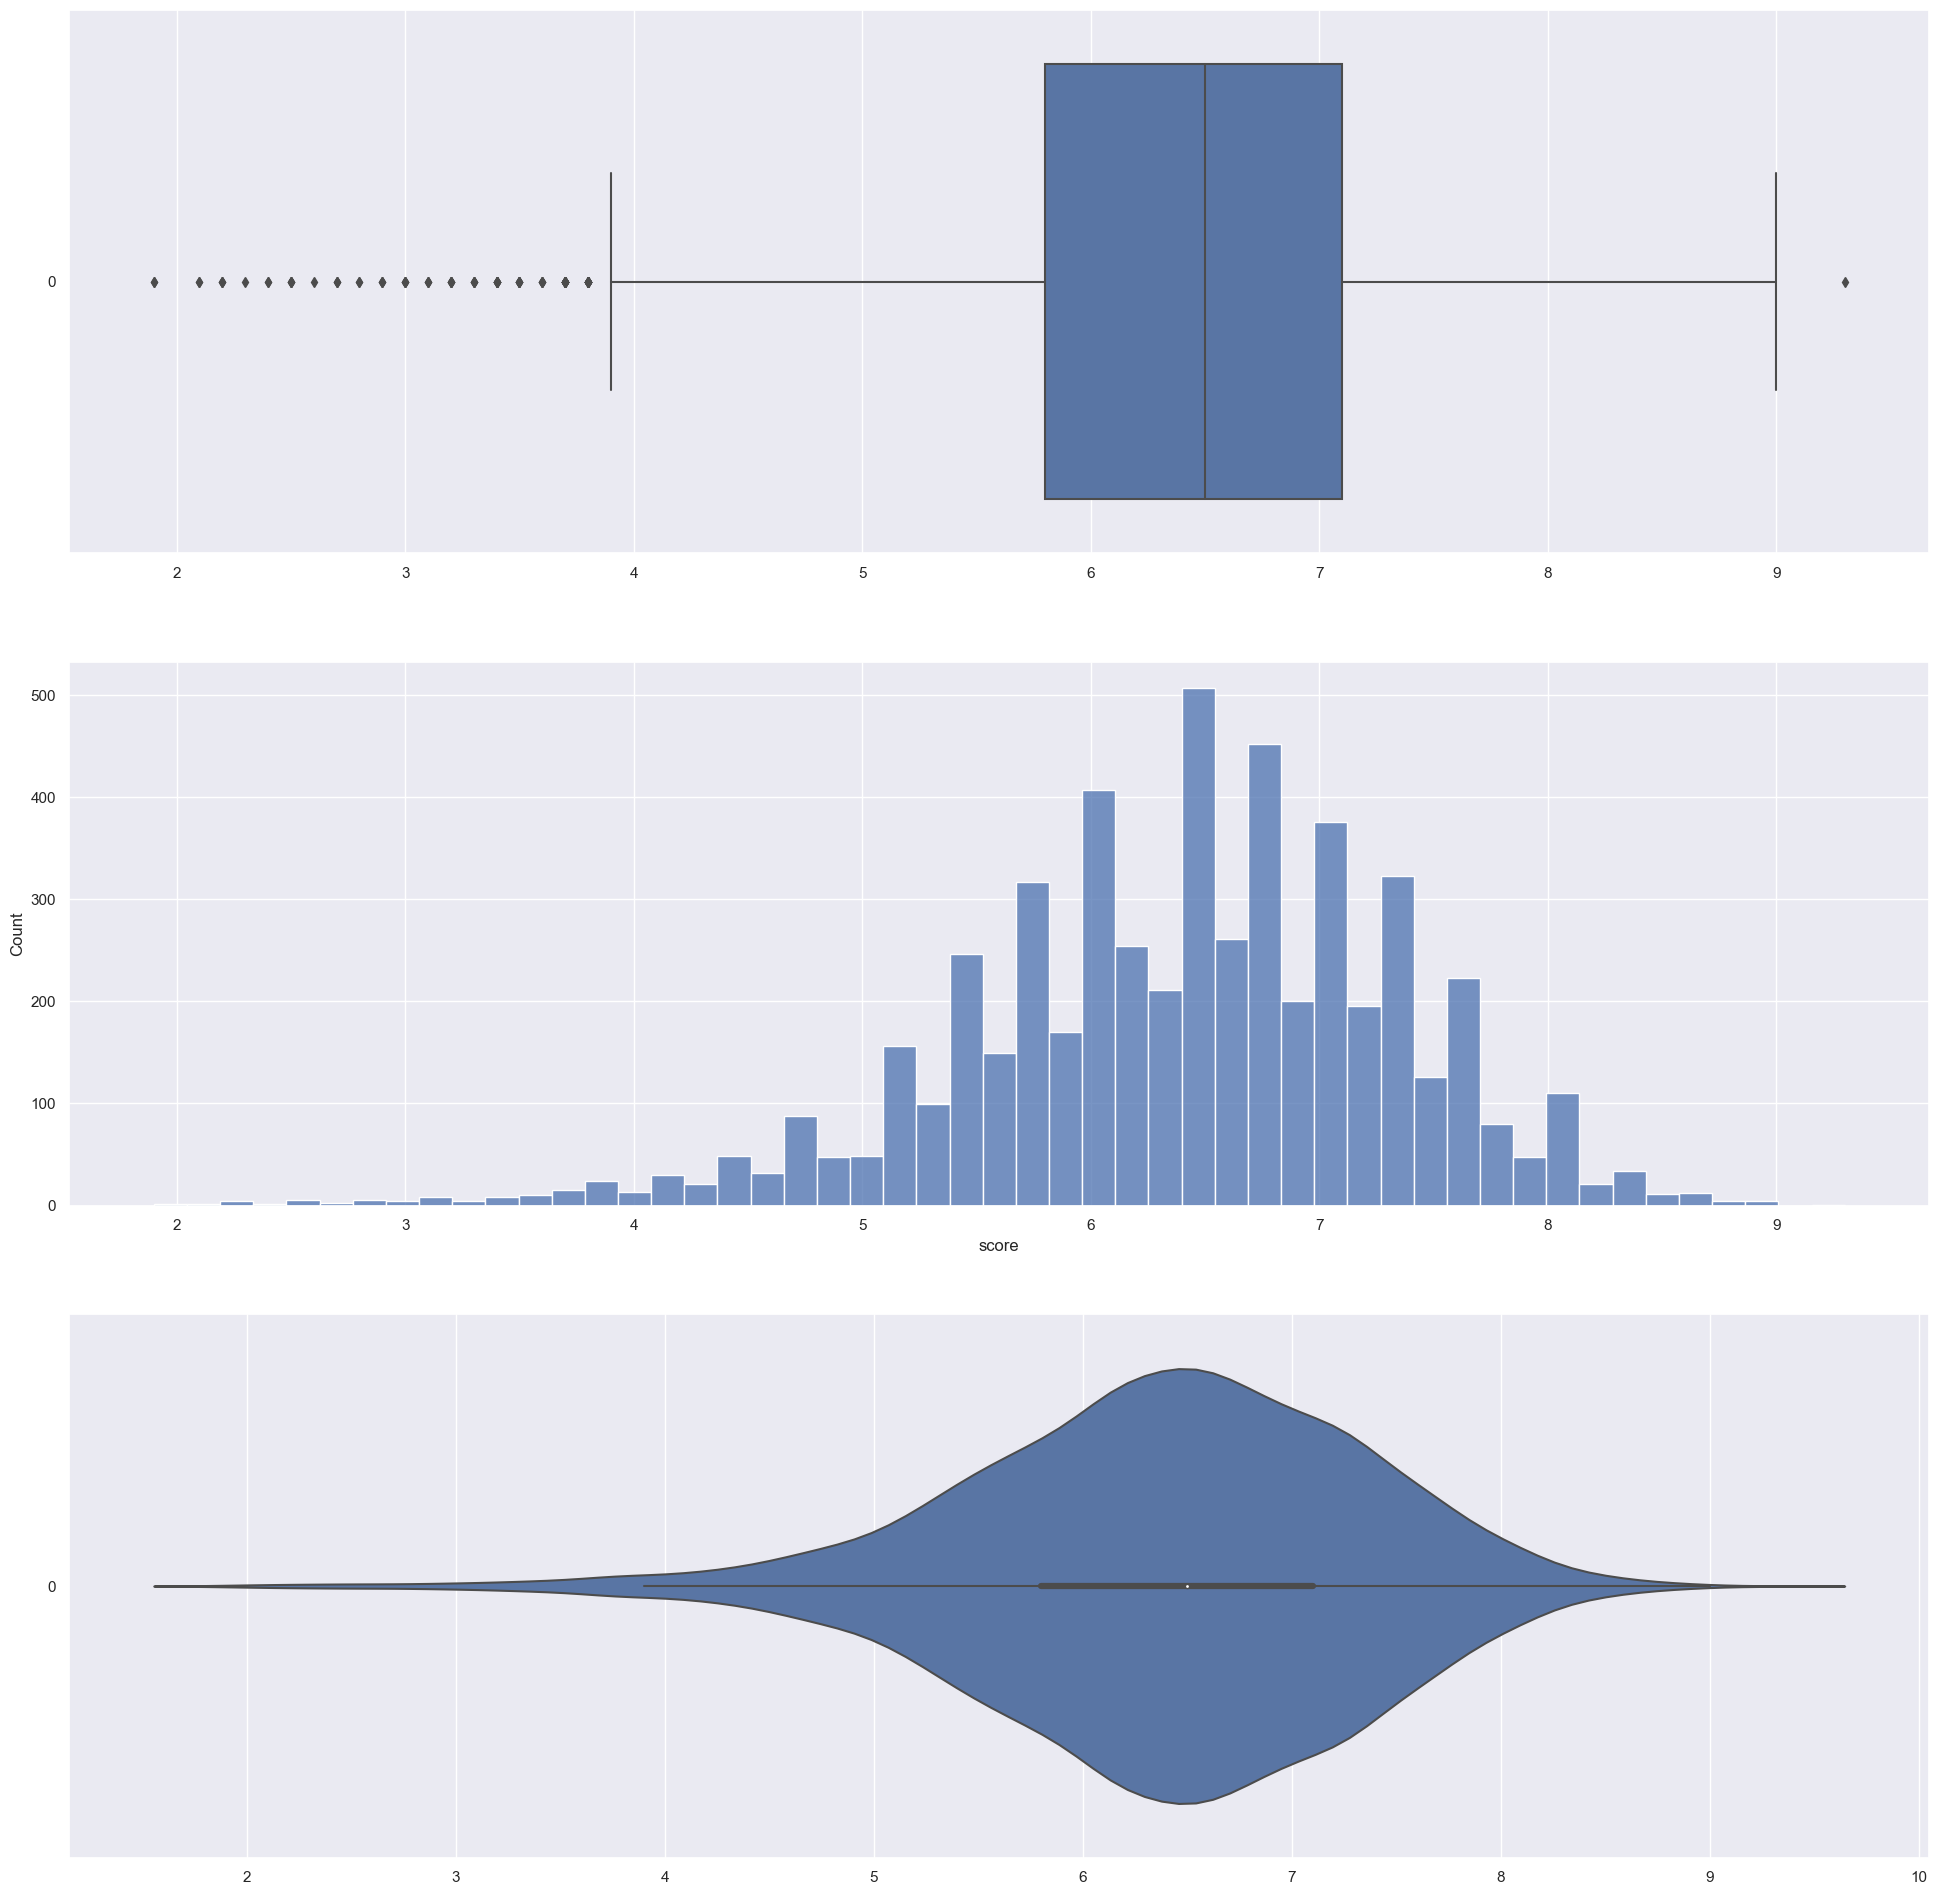

In [59]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = movieData["score"], orient = "h", ax = axes[0])
sb.histplot(data = movieData["score"],ax = axes[1])
sb.violinplot(data = movieData["score"], orient = "h", ax = axes[2])

We decided to convert the continuous "score" variable into a categorical variable that indicates if a movie is "successful". We chose the 80th percentile as the cutoff for success since this cutoff captures movies that perform significantly better than the majority while avoiding extreme outliers. 

The 80th percentile value was found to be 7.2 so if the score of the movie is equal to or more than 7.2, we categorized it as a "sucessful" movie.

In [60]:
np.percentile(movieData["score"],80)

7.2

In [61]:
(movieData["score"] >= 7.2).value_counts()

False    4231
True     1192
Name: score, dtype: int64

In [67]:
movieData.head()

,gross,runtime,budget,votes,country,genre,rating,score
0,46998772.0,146.0,19000000.0,927000.0,United Kingdom,Drama,R,8.4
1,58853106.0,104.0,4500000.0,65000.0,United States,Adventure,R,5.8
2,538375067.0,124.0,18000000.0,1200000.0,United States,Action,PG,8.7
3,83453539.0,88.0,3500000.0,221000.0,United States,Comedy,PG,7.7
4,39846344.0,98.0,6000000.0,108000.0,United States,Comedy,R,7.3


The dataset is split into predictor variables (X) and the target variable (y). Our predictor variables are encoded using one-hot encoding to convert categorical variables into a format suitable for logistic regression. The target variable y score is transformed to represent whether a movie is "successful" (1) or not (0) based on the defined threshold, 7.2. The dataset is then split into training and testing sets, with 80% for training and 20% for testing.

In [62]:
# Split the DataFrame into predictors and response
X, y = movieData.iloc[:, :-1], movieData.iloc[:, -1]

X_encoded = pd.get_dummies(X)

# Define 'successful' as score >= 7.2
y = (y >= 7.2).astype('int64')

# Split the dataset into 80% train and 20% test set
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.8)

# Print the proportion of 'successful' vs. 'not successful' movies in the train set
print("successful vs Not successful Movies Train Set Proportion")
print(y_train.value_counts()[1], ':', y_train.value_counts()[0])


successful vs Not successful Movies Train Set Proportion
949 : 3389


In [63]:
movieData_df = pd.concat([X_train, y_train], axis=1).rename(columns={'score': 'is_successful'})
movieData_df.head()

,gross,runtime,budget,votes,country_Argentina,country_Aruba,country_Australia,country_Austria,country_Belgium,country_Brazil,...,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unrated,rating_X,is_successful
2344,47737094.0,90.0,15000000.0,36000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
925,35763605.0,84.0,13000000.0,47000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3250,120673227.0,139.0,40000000.0,297000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2032,3020601.0,113.0,8000000.0,12000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4093,97231420.0,111.0,40000000.0,131000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Classification of train by Logistic Regression

Logistic regression is applied to classify movies as "successful" or not based on the predictor variables. The logistic regression model is trained using the training data (X_train and y_train). The overall classification accuracy of the model is calculated on the testing data (X_test and y_test). This accuracy metric provides an indication of how well the model performs in predicting the success of movies based on the chosen features.

In [70]:
from sklearn.model_selection import train_test_split

# Assign x and y value
X = movieData_df.drop(['is_successful'], axis=1)  # Features
y = movieData_df['is_successful']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#Calculate the odds of a movie being successful
print("The odds of a movie being successful in train dataset is: ", y_train.value_counts()[1]/y_train.value_counts()[0])

#Perform the logistics regression
logreg1 = LogisticRegression()
 
#Fit the data
logreg1.fit(X_train,y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t\t: ", logreg1.score(X_test,y_test))

The odds of a movie being successful in train dataset is:  0.27406318883174136
The overall classification accuracy 			:  0.8433179723502304


In [72]:
# Function to calculate all rates
def calculate_rates(cf):
    tp = cf[1, 1]
    fn = cf[1, 0]
    fp = cf[0, 1]
    tn = cf[0, 0]
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0.0
    tnr = tn / (tn + fp) if (tn + fp) != 0 else 0.0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0.0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0.0
    
    return tpr, tnr, fpr, fnr

# Function to visualize predictions
# Function to visualize predictions
def visualize_preds(table, y_true, y_pred, title):
    f = plt.figure(figsize=(10, 8))
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)

    # Calculate metrics
    accuracy = np.trace(cf) / float(np.sum(cf))
    if sum(cf[:, 1]) == 0:
        precision = 0.0
    else:
        precision = cf[1, 1] / sum(cf[:, 1])
    recall = cf[1, 1] / (cf[1, 1] + cf[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

    # Calculate rates
    tpr, tnr, fpr, fnr = calculate_rates(cf)
    
    stats_text = f'\n\nAccuracy={accuracy:.2f}\nPrecision={precision:.2f}\nRecall={recall:.2f}\nF1 Score={f1_score:.2f}'
    rate_text = f'\n\nTPR={tpr:.2f}, \nTNR={tnr:.2f}, \nFPR={fpr:.2f}, \nFNR={fnr:.2f}'
    plt.xlabel('Predicted' + stats_text + rate_text)
    plt.ylabel('Actual')
    plt.title(title)


    return table




In [73]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()

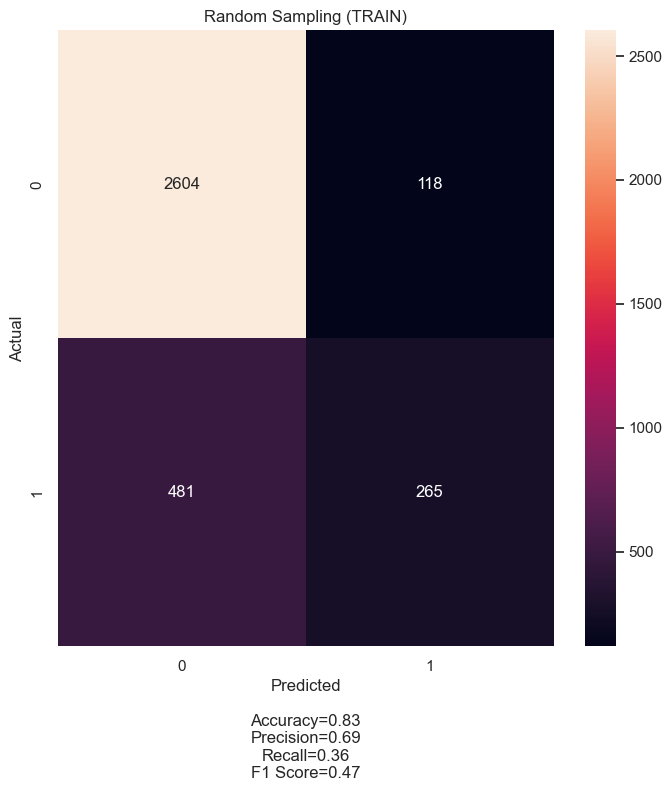

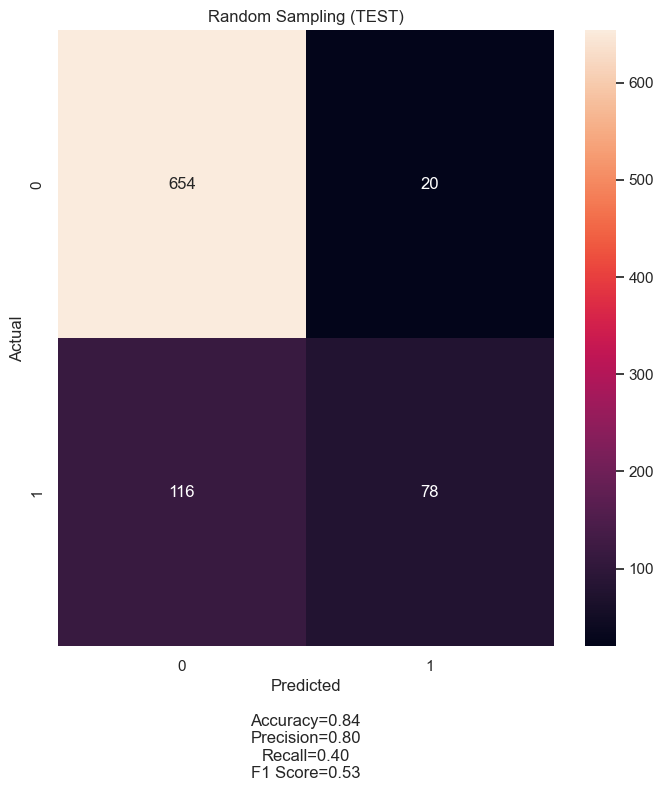

In [74]:
#Predict the data
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'Random Sampling (TRAIN)')
table2 = visualize_preds(table2,y_test,y_test_pred, title = 'Random Sampling (TEST)')

#### METRICS USED:

1. **Accuracy**: Measures the overall correctness of predictions.

2. **Precision**: Measures the accuracy of positive predictions.

3. **Recall (Sensitivity)**: Measures the completeness of positive predictions.

4. **F1 Score**: Balances precision and recall for a single metric.

5. **True positive rate/True Negative Rate/False Positive Rate/False Negative Rate**: Correctly identified positives/negatives and Incorrectly identified positives/negatives.

These metrics help evaluate how well a classification model performs in terms of making correct predictions and minimizing errors.



Both the training and test sets **consistently** show a low True Positive Rate (TPR), indicating that some positive cases are missed. However, the True Negative Rate (TNR) is **consistently** high, suggesting that a very high proportion of negative cases is correctly identified as negative. The False Positive Rate (FPR) is **consistently** low, indicating only a few negative cases are incorrectly classified as positive. However, the False Negative Rate (FNR) is slightly high, indicating some positive cases are incorrectly classified as negative.


The model shows reasonably good performance on both the training and test sets. It achieves a relatively **high accuracy** on both sets, indicating that it correctly predicts the class labels for a large portion of the instances. The precision values suggest that the model makes positive predictions with **moderate confidence**, and the recall values indicate that it captures a **substantial portion** of the true positive instances. 

Comparing the performance between the training and test sets, the model demonstrates similar accuracy and F1 scores, indicating that it generalizes reasonably well to unseen data. However, there are very slight differences in precision and recall between the two sets, suggesting some variation in the model's performance on unseen data compared to the training data.

Overall, the model's performance is promising.

## Part 4: Comparison between statistical models

The Random Forest Regression model initially exhibits a high training R^2 score, indicating a strong fit to the training data. However, this model demonstrates a lower testing R^2 score, suggesting potential overfitting and suboptimal performance on unseen data. Despite efforts to remove outliers and optimize hyperparameters, the model's predictive capability remains limited, as evidenced by the relatively low R^2 scores and consistent error metrics.

In contrast, the Logistic Regression model showcases a more balanced performance between the training and test sets. The Logistic Regression model's performance generalizes reasonably well to unseen data, as evidenced by similar accuracy and F1 scores between the training and test sets. Additionally, the precision and recall metrics indicate a satisfactory balance between correctly predicting positive instances and capturing true positive instances.

Therefore, based on the comparative analysis, the **Logistic Regression model** emerges as the better-performing option due to its ability to generalize effectively to unseen data and maintain consistent performance metrics across training and test sets.